<a href="https://colab.research.google.com/github/baminro/Portfolio/blob/main/Portfolionew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install openpyxl

In [ ]:


import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt # Visualization
import matplotlib.dates as mdates # Formatting dates
import seaborn as sns # Visualization
from sklearn.preprocessing import MinMaxScaler
import torch # Library for implementing Deep Neural Network
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [ ]:
CVS=pd.read_excel('/content/drive/MyDrive/out.xlsx')
CVS
CVS.to_csv('/content/drive/MyDrive/out.csv')

In [ ]:
import os
directory = r'/content/drive/MyDrive/Adjusted2'
df=[]
files_in_directory = os.listdir(directory)
filtered_files = [file for file in files_in_directory if file.endswith(".csv")]
for file in filtered_files:
    path_to_file = os.path.join(directory, file)
    aux=pd.read_csv(path_to_file, encoding="utf-16")
    df.append(aux)
df=pd.concat(df)
df['<TICKER>']= df['<TICKER>'].str.replace('-ت', '')
df['<COL12>']= df['<COL12>'].str.replace('-ت', '')
df['<COL12>']= df['<COL12>'].str.replace('_', ' ')
df['<TICKER>']= df['<TICKER>'].str.replace('_', ' ')


df.to_excel('/content/drive/MyDrive/out.xlsx')
import datetime
from datetime import datetime as dt
df['<DTYYYYMMDD>']=df['<DTYYYYMMDD>'].apply(lambda x : dt.strptime(str(x), '%Y%m%d'))

#df['<DTYYYYMMDD>'] = pd.to_datetime(df['<DTYYYYMMDD>']).dt.date
#df['<DTYYYYMMDD>'] = df['<DTYYYYMMDD>'].dt.strftime('%Y%m%d')
df=df.set_index('<DTYYYYMMDD>')
df

,<TICKER>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<COL11>,<COL12>,<COL14>
<DTYYYYMMDD>,,,,,,,,,
2013-07-09,تاپيكو,649.85,650.0,650.0,649.85,1450000000,PTAP,س. نفت و گاز و پتروشيمي تأمين,13920418
2013-07-10,تاپيكو,675.85,676.0,676.0,675.85,9100279,PTAP,س. نفت و گاز و پتروشيمي تأمين,13920419
2013-07-13,تاپيكو,702.77,703.0,672.0,689.96,286615698,PTAP,س. نفت و گاز و پتروشيمي تأمين,13920422
2013-07-14,تاپيكو,683.28,685.0,663.0,671.39,79697159,PTAP,س. نفت و گاز و پتروشيمي تأمين,13920423
2013-07-15,تاپيكو,679.56,698.0,678.0,688.10,59148749,PTAP,س. نفت و گاز و پتروشيمي تأمين,13920424
...,...,...,...,...,...,...,...,...,...
2026-01-24,مبين,18260.00,19190.0,18240.0,18240.00,14142581,MOBN,مبين انرژي خليج فارس,14041104
2026-01-25,مبين,17700.00,17700.0,17700.0,17700.00,12934309,MOBN,مبين انرژي خليج فارس,14041105
2026-01-26,مبين,17170.00,17170.0,17170.0,17170.00,19568682,MOBN,مبين انرژي خليج فارس,14041106


In [ ]:
df.groupby('<TICKER>').groups.keys()

In [ ]:
df = df[df['<TICKER>']=='فخوز'].copy()

df=df[['<OPEN>','<HIGH>',   '<LOW>','<CLOSE>','<VOL>']]
def data_plot(df):
  df_plot = df.copy()
  ncols = 2
  nrows = int(round(df_plot.shape[1] / ncols, 0))

  fig, ax = plt.subplots(nrows=nrows+1, ncols=ncols,sharex=True, figsize=(14, 7))
  for i, ax in enumerate(fig.axes):
     sns.lineplot(data=df_plot.iloc[:, i-1], ax=ax)
     ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
     ax.xaxis.set_major_locator(mdates.AutoDateLocator())
  fig.tight_layout()
  plt.show()

data_plot(df)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.2 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs
CPU times: user 0 ns, sys: 4 µs, total: 4 µs
Wall time: 5.96 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


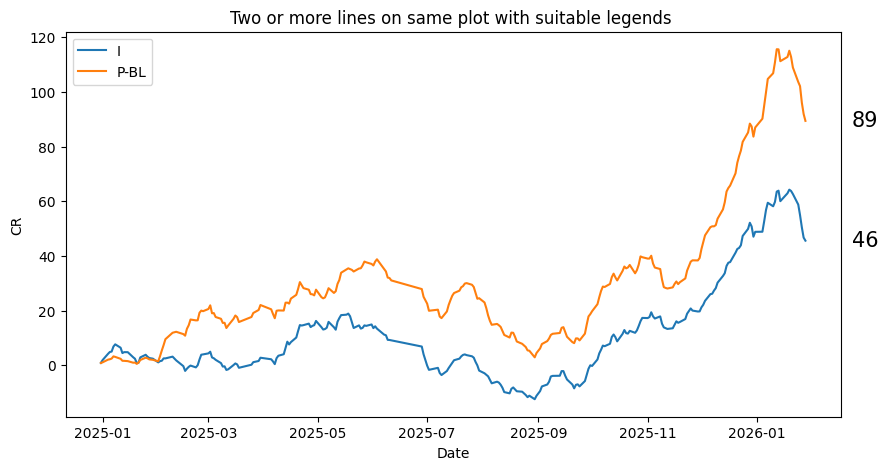

sharpe PO_BL:2.133
sharpe III:0.9212
sortino PO_BL:2.9402
sortino III:1.26
max_drawdown PO_BL:-0.2585
max_drawdown III:-0.2634
calmar, alpha, beta-P_BL:[1.77 0.31 0.89]
calmar, alpha, beta-III:[0.72 0.   1.  ]


,return III,returnbl,cumluative_returnbl,cumluative_return III
D,,,,
2024-12-31,0.008988,0.008413,0.841301,0.898783
2025-01-01,0.010433,0.002550,1.098438,1.951448
2025-01-04,0.022140,0.009721,2.081171,4.208613
2025-01-05,0.006468,0.001332,2.217174,4.882601
2025-01-06,0.001354,0.002394,2.461855,5.024661
...,...,...,...,...
2026-01-24,-0.023742,-0.025392,103.622950,58.794644
2026-01-25,-0.024485,-0.007526,102.090541,54.906488
2026-01-26,-0.028643,-0.029848,96.058468,50.469514


In [ ]:
from scipy.optimize import minimize, brute
import scipy.optimize as opt
from datetime import timedelta
dfind1 = df.loc[:, ~df.columns.str.contains('^Unnamed')]
dfind3=dfind1.loc[: , :]
"""dfind4=dfind3[(dfind3['T']=='KIMIA') | (dfind3['T']=='HORMOZ')| (dfind3['T']=='SAVEH')| (dfind3['T']=='FEOLAY')| (dfind3['T']=='FEOLAD')
       | (dfind3['T']=='FEKHOZ')| (dfind3['T']=='SHEGHASIR')| (dfind3['T']=='CEFANO')| (dfind3['T']=='JAMPILEN')| (dfind3['T']== 'SHETRAN')
       | (dfind3['T']=='FESEPA')|(dfind3['T']=='CEROOD')|(dfind3['T']=='SHRANOL')|(dfind3['T']=='FAJR')|(dfind3['T']=='FEROY')
       |(dfind3['T']=='SHARAK')|(dfind3['T']=='KHORASAN')|(dfind3['T']=='FEBAHONAR')|(dfind3['T']=='CEKHOOZ')|(dfind3['T']=='TEPIX')
       |(dfind3['T']=='FEMELI')|(dfind3['T']=='BUALI')|(dfind3['T']=='ZOB')|(dfind3['T']=='NOORI')|(dfind3['T']=='SHBASIR')
       |(dfind3['T']=='SHESADAF')|(dfind3['T']=='DELER')|(dfind3['T']=='SHBEHRAN')|(dfind3['T']=='CEKHAZAR')|(dfind3['T']=='SHAPNA')
       |(dfind3['T']=='GHSHAHD')|(dfind3['T']=='FEZARIN')|(dfind3['T']=='FENAVARD')|(dfind3['T']=='KAVEH')|(dfind3['T']=='CEOROUM')
       |(dfind3['T']=='SHKHARK')|(dfind3['T']=='SHPAS')|(dfind3['T']=='CEBAHAN')|(dfind3['T']=='SHEGOOYA')|(dfind3['T']=='CEGHARB')
       |(dfind3['T']=='CEPAHA')|(dfind3['T']=='SHAPDIS')|(dfind3['T']=='GHEAASHAHD')|(dfind3['T']=='GHEHEKMAT')|(dfind3['T']=='CESHARGH')
       |(dfind3['T']=='CEKORD')|(dfind3['T']=='GHEGOL')|(dfind3['T']=='SABZEVA')|(dfind3['T']=='PEKAVIR')|(dfind3['T']=='CEMAZAN')
       |(dfind3['T']=='CEARBIL')|(dfind3['T']=='CESHOMAL')|(dfind3['T']=='BEHPAK')|(dfind3['T']=='KEGOL')|(dfind3['T']=='KEGOHAR')
       |(dfind3['T']=='GHSHEKAR')|(dfind3['T']=='GHENISHA')|(dfind3['T']=='KESERAM')|(dfind3['T']=='ARYA')|(dfind3['T']=='DEFRAA')
       |(dfind3['T']=='DETMAD')|(dfind3['T']=='FEOLAJH')|(dfind3['T']=='MAROON')|(dfind3['T']=='JAM')|(dfind3['T']=='KECHAD')
       |(dfind3['T']=='PARS')|(dfind3['T']=='SHIRAZ')|(dfind3['T']=='VABEMELAT')|(dfind3['T']=='SHRANGI')|(dfind3['T']=='KHODRO')
       |(dfind3['T']=='KHSAAPA')|(dfind3['T']=='ZAGROS')|(dfind3['T']=='SHBANDAR')|(dfind3['T']=='ZEPARS')|(dfind3['T']=='ZEGHIAM')]"""

"""dfind4=dfind3[(dfind3['<TICKER>']=='فملي') | (dfind3['<TICKER>']=='وبملت')|(dfind3['<TICKER>']=='فولاد')|
 (dfind3['<TICKER>']=='فارس')|(dfind3['<TICKER>']=='نوري')| (dfind3['<TICKER>']=='شاخص كل6')]
dict_keys(['بوعلي', 'تاصيكو', 'تاپيكو', 'جم', 'حكشتي', 'خساپا', 'خودرو', 'رمپنا', 'شاخص كل6', 'شبريز',
           'شبندر', 'شتران', 'شستا', 'شپديس', 'شپنا', 'فارس', 'فملي',
           'فولاد', 'كچاد', 'كگل', 'مبين', 'نوري', 'واميد', 'وبملت', 'وتجارت',
           'وصندوق', 'وغدير', 'ومعادن', 'وپاسار', 'پارس', 'پارسان'])

dfind4=dfind3[(dfind3['<TICKER>']=='فملي') | (dfind3['<TICKER>']=='پارسان')|(dfind3['<TICKER>']=='فولاد')|
 (dfind3['<TICKER>']=='وبشهر')|(dfind3['<TICKER>']=='ومعادن')|
              (dfind3['<TICKER>']=='وغدير')|(dfind3['<TICKER>']=='وساپا')|
              (dfind3['<TICKER>']=='رمپنا')|(dfind3['<TICKER>']=='سفارس')|
               (dfind3['<TICKER>']=='وبملت')| (dfind3['<TICKER>']=='تاپيكو')|
                (dfind3['<TICKER>']=='فارس')| (dfind3['<TICKER>']=='تيپيكو')|
                   (dfind3['<TICKER>']=='وبانك')|(dfind3['<TICKER>']=='شاخص كل6')]"""


"""tickers = [
    'بوعلي', 'تاصيكو', 'تاپيكو', 'جم', 'حكشتي', 'خساپا', 'خودرو', 'رمپنا',
    'شاخص كل6', 'شبريز', 'شبندر', 'شتران', 'شستا', 'شپديس', 'شپنا',
    'فارس', 'فملي', 'فولاد', 'كچاد', 'كگل', 'مبين', 'نوري', 'واميد',
    'وبملت', 'وتجارت', 'وصندوق', 'وغدير', 'ومعادن', 'وپاسار',
    'پارس', 'پارسان'
]"""

tickers = [
     'تاصيكو', 'جم',
    'شاخص كل6', 'شبريز', 'شبندر', 'شپديس',
     'فملي', 'مبين', 'نوري',
    'پارس', 'پارسان'
]
dfind4 = dfind3[dfind3['<TICKER>'].isin(tickers)]


dfind4=dfind4.reset_index()
dfind4.columns=['D','T','O','H','L','C','V','COL1','COL2','COL4']
#df57['D']=pd.to_datetime(df57[','D'])
z=dfind4.groupby('T')['D'].apply(lambda x: x.count())
z=pd.DataFrame(z)
z=z.rename(columns={"D": "z"})
vk=z[z['z']>252]['z']
vk=pd.DataFrame(vk)
dfind4=dfind4.set_index('T')
dfind5=dfind4.join(vk,how='inner')
dfind5=dfind5.reset_index()
dfind5=dfind5.set_index('D')
warm=252
bb=21


#df4=df4.ix[str(datetime.datetime.today()-timedelta(days=5000)).split()[0]:str(datetime.datetime.today()-timedelta(days=245))
dftt3=dfind5[['T','C']]

#dft1=dft.groupby('T').resample('D').last()

dfind6=dftt3.reset_index().pivot_table(values='C', index=['D'], columns='T', aggfunc='mean')
dfind7=dfind6.fillna(method='ffill')
#dfind7=dfind21.fillna(method='bfill')
WWW=[]
co=[]
initial_capital = float(1000)
initial_capital1=float(1000)
poh=list(dfind7.columns)
poh.remove("شاخص كل6")
W0=(len(list(poh)))*[ 1./(len(list(poh))),]
W0 = [element * 0 for element in W0]
result35=[]
TAU=[]
#W0=(len(list(rets)))*[ 1./(len(list(rets)))]
for f in range(0,warm,bb):
    dfind8=dfind7[f:dfind7.shape[0]-warm+f]
    rets11= (dfind8/dfind8.shift(1))-1
    rets11=rets11[list(rets11.columns)]




    #rets11=rets11.dropna()
#rets11=rets11[~((rets11-rets11.mean()).abs() > 3*rets11.std())]
    #q_low = rets11.quantile(0.0015)
    #q_hi  = rets11.quantile(0.9985)
    #rets11 = rets11[(rets11 < q_hi) & (rets11 > q_low)]
    rets11=rets11.dropna()
    rff=0.21
    Te=252
    rets=rets11.drop(columns=['شاخص كل6'])
    retstep=pd.DataFrame(rets11['شاخص كل6'],columns=['شاخص كل6'])
    br=(tuple(0.0088 for x in range(len(list(rets)))))
    cr=(tuple(0 for x in range(len(list(rets)))))
    dr=(tuple(0.00371 for x in range(len(list(rets)))))
    er=(tuple(0 for x in range(len(list(rets)))))
#W0=[0.248388336,0.143041775,0.120202658,0.115110052,
   # 0.074132915,0.067111938,0.048815788,0.044103681,
   # 0.032585542,0.031213032,0.029160613,0.026537302,
   # 0.012718921,0.003810042,0.003066463,0.000000940,
  #  0.000000002,0.000000000,0.000000000,
#]
    #W0=(len(list(rets)))*[ 1./(len(list(rets)))]
    br=np.array(br)
    cr=np.array(cr)
    dr=np.array(dr)
    er=np.array(er)
    V=10
    P=pd.DataFrame(np.zeros((V, len(rets.columns))),columns=rets.columns)
    q = np.zeros((V, 1))
    Omega = np.zeros((V,V))
    # View 1
    """P['فملي'][0] = 1
    q[0] = 0.480679
    Omega[0, 0] = (0.298330)**2  # = 0.088999

    # View 2
    P['فارس'][1] = 1
    q[1] = 0.414655
    Omega[1, 1] = (0.280624)**2  # = 0.078751

    # View 3
    P['پارسان'][2] = 1
    q[2] = 0.528515
    Omega[2, 2] = (0.323960)**2  # = 0.104950

    P['فولاد'][3] = 1
    q[3] = 0.412087
    Omega[3, 3] = (0.308267)**2  # = 0.095032

    P['وبملت'][4] = 1
    q[4] = 0.452683
    Omega[4, 4] = (0.319630)**2  # = 0.102163

    P['وغدير'][5] = 1
    q[5] = 0.446109
    Omega[5, 5] = (0.298163)**2  # = 0.088902

    P['ومعادن'][6] = 1
    q[6] = 0.441292
    Omega[6, 6] = (0.320496)**2  # = 0.102717

    P['رمپنا'][7] = 1
    q[7] = 0.389067
    Omega[7, 7] = (0.356639)**2  # = 0.127190

    P['بوعلي'][8] = 1
    q[8] = 0.481082
    Omega[8, 8] = (0.340712)**2  # = 0.116086

    P['تاصيكو'][9] = 1
    q[9] = 0.627532
    Omega[9, 9] = (0.327592)**2  # = 0.107313

    P['تاپيكو'][10] = 1
    q[10] = 0.394894
    Omega[10, 10] = (0.321871)**2  # = 0.103600

    P['جم'][11] = 1
    q[11] = 0.438685
    Omega[11, 11] = (0.255664)**2  # = 0.065365

    P['حكشتي'][12] = 1
    q[12] = 0.270398
    Omega[12, 12] = (0.340985)**2  # = 0.116272

    P['خساپا'][13] = 1
    q[13] = 0.353639
    Omega[13, 13] = (0.349594)**2  # = 0.122216

    P['خودرو'][14] = 1
    q[14] = 0.292330
    Omega[14, 14] = (0.345318)**2  # = 0.119246

    P['شبريز'][15] = 1
    q[15] = 0.644746
    Omega[15, 15] = (0.371414)**2  # = 0.137949

    P['شبندر'][16] = 1
    q[16] = 0.626650
    Omega[16, 16] = (0.393100)**2  # = 0.154527

    P['شتران'][17] = 1
    q[17] = 0.541339
    Omega[17, 17] = (0.388427)**2  # = 0.150873

    P['شستا'][18] = 1
    q[18] = 0.503633
    Omega[18, 18] = (0.357020)**2  # = 0.127462

    P['شپديس'][19] = 1
    q[19] = 0.564858
    Omega[19, 19] = (0.307666)**2  # = 0.094658

    P['شپنا'][20] = 1
    q[20] = 0.509388
    Omega[20, 20] = (0.360554)**2  # = 0.129999

    P['كچاد'][21] = 1
    q[21] = 0.449751
    Omega[21, 21] = (0.479152)**2  # = 0.229592

    P['كگل'][22] = 1
    q[22] = 0.322856
    Omega[22, 22] = (0.281177)**2  # = 0.079060

    P['مبين'][23] = 1
    q[23] = 0.536773
    Omega[23, 23] = (0.283913)**2  # = 0.080609

    P['نوري'][24] = 1
    q[24] = 0.763560
    Omega[24, 24] = (0.378030)**2  # = 0.142902

    P['واميد'][25] = 1
    q[25] = 0.413225
    Omega[25, 25] = (0.234486)**2  # = 0.054987

    P['وتجارت'][26] = 1
    q[26] = 0.305574
    Omega[26, 26] = (0.336087)**2  # = 0.112956

    P['وصندوق'][27] = 1
    q[27] = 0.422753
    Omega[27, 27] = (0.267711)**2  # = 0.071668

    P['وپاسار'][28] = 1
    q[28] = 0.359587
    Omega[28, 28] = (0.285356)**2  # = 0.081428

    P['پارس'][29] = 1
    q[29] = 0.485250
    Omega[29, 29] = (0.308615)**2  # = 0.095245"""
        # View 1
    P['فملي'][0] = 1
    q[0] = 0.480679
    Omega[0, 0] = (0.298330)**2  # = 0.088999


    # View 3
    P['پارسان'][1] = 1
    q[1] = 0.528515
    Omega[1, 1] = (0.323960)**2  # = 0.104950


    P['تاصيكو'][2] = 1
    q[2] = 0.627532
    Omega[2, 2] = (0.327592)**2  # = 0.107313


    P['جم'][3] = 1
    q[3] = 0.438685
    Omega[3, 3] = (0.255664)**2  # = 0.065365


    P['شبريز'][4] = 1
    q[4] = 0.644746
    Omega[4, 4] = (0.371414)**2  # = 0.137949

    P['شبندر'][5] = 1
    q[5] = 0.626650
    Omega[5, 5] = (0.393100)**2  # = 0.154527



    P['شپديس'][6] = 1
    q[6] = 0.564858
    Omega[6, 6] = (0.307666)**2  # = 0.094658



    P['مبين'][7] = 1
    q[7] = 0.536773
    Omega[7, 7] = (0.283913)**2  # = 0.080609

    P['نوري'][8] = 1
    q[8] = 0.763560
    Omega[8, 8] = (0.378030)**2  # = 0.142902


    P['پارس'][9] = 1
    q[9] = 0.485250
    Omega[9, 9] = (0.308615)**2  # = 0.095245


    bizyear2bizday = 1/252
    q = q*bizyear2bizday
    Omega = Omega*bizyear2bizday
    Sigma = rets.cov()
    tau = 1/(len(rets.index))
    C = tau*Sigma
    numAssets = len(rets.columns)
    LB = np.zeros((1,numAssets))
    Aeq = np.ones((1,numAssets))
    Beq = 1
    import cvxpy as cp
    A = rets.values
    b = retstep.values

    b = np.squeeze(b)
    x = cp.Variable(A.shape[1])

    objective = cp.Minimize(0.5 * cp.sum_squares(A@x-b))
    constraints = [x >= 0, x <= 1,sum(x)==1]

    prob = cp.Problem(objective, constraints)
    resultrt = prob.solve()

    intercept = x.value[0]
    slope = x.value[1]
    wtsMarket=pd.DataFrame(x.value,columns=['wts'])
    shpr = ((retstep).mean()-(rff/252))/(retstep).std()
    delta = shpr.values/np.sqrt(np.dot(np.dot(wtsMarket.T.values,Sigma.values),wtsMarket.values))
    PI = delta*np.dot(Sigma.values,wtsMarket)
    xu=(np.linalg.inv(np.dot(P.T,np.dot(np.linalg.inv(Omega),P))+np.linalg.inv(C)))
    xv=np.dot(np.linalg.inv(C),PI )+np.dot(P.T,np.dot(np.linalg.inv(Omega),q))
    mu_bll=np.dot(xu,xv)
    cov_muu = xu

    mu_bl=pd.DataFrame(mu_bll,index=rets.columns)[0]
    cov_mu=pd.DataFrame(cov_muu+Sigma.values,index=rets.columns,columns=rets.columns)
    def statistics (weights):
         weights =np.array(weights)
         pret =np.sum(mu_bl*weights-br*np.maximum(cr ,W0-weights)-dr*np.maximum(er ,weights-W0))*252
         pvol =np.sqrt(np.dot(weights.T, np.dot((cov_mu), weights)))*np.sqrt(252)
         return np.array([ pret , pvol,(pret-(rff/Te))/ pvol])

    def min_func_sharpe(weights):
         return statistics(weights)[2] -1

    cons=({ 'type':'eq', 'fun':lambda x:np.sum(x)-1})
    bnds1=([0.01,0.10],[0.01,0.10],[0.01,0.10],[0.01,0.10],[0.01,0.10],[0.01,0.011120095],[0.01,0.055363056],
           [0.01,0.035856909],[0.01,0.10],[0.01,0.073734555],[0.01,0.020344063],[0.01,0.10],[0.01,0.032289136],
           [0.01,0.098868972],[0.01,0.024035425],[0,0.000470468],[0.01,0.024854396],[0,0.008777141],[0,0.003323951])
    bnds=([0,0.171011808],[0,0.152613168],[0,0.215865875],[0,0.318804451],[0,0.157245484],[0,0.011120095],[0,0.055363056],
           [0,0.035856909],[0,0.621439332],[0,0.073734555],[0,0.020344063],[0,0.454554391],[0,0.032289136],
           [0,0.098868972],[0,0.024035425],[0,0.000470468],[0,0.024854396],[0,0.008777141],[0,0.003323951])
    bnds2=tuple([0.01,0.20] for x in range(len(list(rets))))
    p0ret =np.sum(rets.mean()*W0)*Te
    p0vol =np.sqrt(np.dot(W0, np.dot(rets.cov()*Te, W0)))

    p0sharp=((p0ret-rff)/p0vol)

    result6=pd.DataFrame([p0ret,p0vol,p0sharp],
                     index=['p0ret','p0vol','p0sharp'],
                     columns=['Initial Portfolio Performance'])
    %time
    opts=opt.minimize(min_func_sharpe,W0,method='SLSQP',bounds=bnds2 ,constraints=cons,options={'maxiter': 1000})

    result1=pd.DataFrame((opts['x'].round(3)).T, index=list(rets),columns=['weights in BLSharp'])

    result=pd.DataFrame(statistics(opts['x'].round(3)).T,
                     index=['ret','vol','sharp'],

                     columns=['perfomance in BLSharp'])
#print(opts['x'].round(3),(list(dft2)))
#print(statistics(opts['x']).round(3))
#pd.set_option('display.max_rows', 100000)
#pd.set_option('expand_frame_repr', False)
#print(result)

#.loc[(result4!=0).any(axis=1)]
    result35.append(result1)
    cost=list(np.array(result1['weights in BLSharp'].values) - np.array(W0))
    co.append(cost)
    #W0=list(result1['weights in BLSharp'].values)
    cocd=[element * 0.00371 if element>=0  else abs(element) * 0.0088   for element in cost]
    cocod=sum(cocd)

    dftes=dfind7[dfind7.shape[0]-warm+f:dfind7.shape[0]-warm+f+bb+1]
    resultorg23=result1
    #dftes=dftes.fillna(method='ffill')
    #dftes=dftes.fillna(method='bfill')
    cap=initial_capital*resultorg23['weights in BLSharp'].values
    hj=(dftes/dftes.shift(1))
    hj=hj.drop(columns=['شاخص كل6'])
    positions=pd.DataFrame(index=hj.index,columns=hj.columns).fillna(0.0)

    #positions=positions.set_index('D')
    #(positions.head(1)).mul(float(cap))
    r=(positions.head(1))+cap
    pd.concat([r,hj])
    hjj=hj.drop(hj.index[:1])
    kl=pd.concat([r,hjj])
    kll=kl.cumprod(skipna=True)
    #kll=kll.fillna(method='ffill')
    kll=kll.fillna(method='ffill')
    #kll=kll.fillna(method='bfill')
    #rf=0.21/252
    kll['hold']=kll.sum(axis=1)
    rf=0.21/252
    rr=(r.sum(axis=1).values)
    kll['cash']=0
    kll['cash']=(initial_capital-kll['hold'])
    kll['cash']=kll['cash'].copy()
    for d in range(1,len(kll.index)):
         kll['cash'].iloc[d]=(1+rf)

    kll['cashcum']=kll['cash'].cumprod()
    kll['port']=kll['cashcum']+kll['hold']


    initial_capital =kll['port'].iloc[-1]
    W0=list((kll[rets.columns].iloc[-1]/kll['port'].iloc[-1]).values)
    kll['port'][0]=kll['port'][0]-cocod*kll['port'][0]
    WWW.append(kll)


klll=pd.concat(WWW)
klll=klll.reset_index()

klll=klll.drop_duplicates(subset=['D'],keep='last')
klll=klll.set_index('D')

#coco=[]
#for d in range(len(co)):
    #coc=[element * 0.00371 if element>=0  else abs(element) * 0.0088   for element in co[d]]
    #cocoo=sum(coc)
    #coco.append(cocoo)

klll['returnbl']=(klll['port']/klll['port'].shift(1))-1
df1117=pd.DataFrame(dftt3[dftt3['T']=='شاخص كل6'])
df1117=df1117.reset_index()
df1117=df1117.set_index('D')
df1117['return']=(df1117['C']/df1117['C'].shift(1))-1
df1117=df1117[df1117.shape[0]-warm+1:df1117.shape[0]]

df1117['return III']=(df1117['C']/df1117['C'].shift(1))-1



df11177=pd.DataFrame(df1117['return III'].dropna())
rts1=pd.DataFrame(klll['returnbl'].dropna())
rts2=rts1.reset_index()
df11122=df11177.reset_index()
df11133=df11122.set_index('D').join(rts2.set_index('D'))
#df11133=df11133.dropna()
#df11133['return'][0]=df11133['return'][0]-coco[int((0)/bb)]
#for s in range(5,len(df11133['return']),bb):
     #df11133['return'][s-1]=df11133['return'][s-1]-coco[int(s/bb)]
#df11133['return'][-1]=df11133['return'][-1]-coco[int(warm/bb)]
df11133['cumluative_returnbl'] = ((np.exp(np.log1p(df11133['returnbl']).cumsum()))-1)*100
df11133['cumluative_return III'] = ((np.exp(np.log1p(df11133['return III']).cumsum()))-1)*100
# plotting the line 1 points
fig=plt.figure(figsize = (10, 5))
plt.plot(df11133['cumluative_return III'].dropna(), label = "I")
plt.plot(df11133['cumluative_returnbl'].dropna(), label = "P-BL")
for var in list(['cumluative_return III','cumluative_returnbl']):
    plt.annotate('%0.0f' % df11133[var].iloc[-1], xy=(1, df11133[var].iloc[-1]), xytext=(8, 0),
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=15, va="center")
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('CR')
# Set a title of the current axes.
plt.title('Two or more lines on same plot with suitable legends ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

def semivol(returns):
    meanxx=np.mean(returns,axis=0)
    returnss=returns-meanxx
    lenxind=returnss.shape[0]
    for i in range(lenxind):
        if returnss.iloc[i]>0:
               returnss.loc[:][i]=0
    semivol=(returnss.T.dot(returnss))/(lenxind-1)
    return semivol
#


def sharpe(returns, rf, days):
    volatility = returns.std() * np.sqrt(days)
    sharpe_ratio = (returns.mean()*days - rf) / volatility
    return sharpe_ratio
def sortino(returns, rf, days):
    volsemi = np.sqrt(semivol(returns))* np.sqrt(days)
    sortino_ratio = (returns.mean()*days - rf) / volsemi
    return sortino_ratio
def max_drawdown(return_series):
    comp_ret = pd.Series((return_series+1).cumprod())
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret/peak)-1
    return dd.min()
import statsmodels.api as sm
from statsmodels import regression
def print_stats(result, benchmark,rf, days):
    max_draw=max_drawdown(np.array(result))
    returns = np.mean(np.array(result)*days)
    volatility = np.std(np.array(result)*np.sqrt(days))
    calmars = (returns-rf)/abs(max_draw)

    X = benchmark
    y = result
    x = sm.add_constant(X)
    model = regression.linear_model.OLS(y, x).fit()
    alpha = model.params[0]
    beta = model.params[1]
    return np.round(np.array([calmars, alpha*252, beta]), 4)

print('sharpe PO_BL:'+ str(round(sharpe(returns=(df11133['returnbl'].dropna()), rf=0.21, days=252),4)))
print('sharpe III:'+ str(round(sharpe(returns=(df11133['return III'].dropna()), rf=0.21, days=252),4)))
print('sortino PO_BL:'+ str(round(sortino(returns=(df11133['returnbl'].dropna()), rf=0.21, days=252),4)))
print('sortino III:'+ str(round(sortino(returns=(df11133['return III'].dropna()), rf=0.21, days=252),4)))
print('max_drawdown PO_BL:'+ str(round(max_drawdown(return_series=(df11133['returnbl'].dropna())),4)))
print('max_drawdown III:'+ str(round(max_drawdown(return_series=(df11133['return III'].dropna())),4)))
print('calmar, alpha, beta-P_BL:'+ str((print_stats(result=(df11133['returnbl'].dropna()),benchmark=df11133['return III'].dropna(), rf=0.21, days=252)).round(2)))
print('calmar, alpha, beta-III:'+ str((print_stats(result=(df11133['return III'].dropna()),benchmark=df11133['return III'].dropna(), rf=0.21, days=252)).round(2)))
df11133.to_excel(r'C:\Users\amin\Desktop\pypi\OUT10.xlsx', index ='سهم', header=True)
df111334=df11133[['returnbl','cumluative_returnbl']]

df11133

In [ ]:
len(df11133['returnbl'].dropna())

In [ ]:
result35



CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.2 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 9.54 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


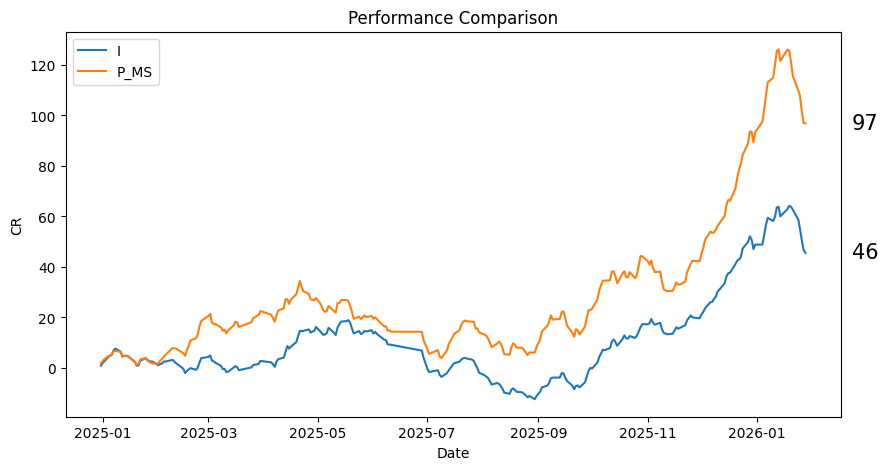

sharpe PO_MS:2.0352
sharpe III:0.9212
sortino PO_MS:2.8422
sortino III:1.26
max_drawdown PO_MS:-0.227
max_drawdown III:-0.2634
calmar, alpha, beta-P_MS:[2.22 0.29 1.07]
calmar, alpha, beta-III:[0.72 0.   1.  ]


,return III,returnms,cumluative_returnms,cumluative_return III
D,,,,
2024-12-31,0.008988,0.017359,1.735901,0.898783
2025-01-01,0.010433,0.010290,2.782721,1.951448
2025-01-04,0.022140,0.018553,4.689615,4.208613
2025-01-05,0.006468,0.001548,4.851650,4.882601
2025-01-06,0.001354,0.005065,5.382743,5.024661
...,...,...,...,...
2026-01-24,-0.023742,-0.026063,109.943380,58.794644
2026-01-25,-0.024485,-0.011121,107.608495,54.906488
2026-01-26,-0.028643,-0.029810,101.419615,50.469514


In [ ]:
dfind1 = df.loc[:, ~df.columns.str.contains('^Unnamed')]
#dfind3=dfind1.loc[str(datetime.datetime.today()-timedelta(days=3000)).split()[0]:str(datetime.datetime.today()-timedelta(days=0)).split()[0]]
dfind3=dfind1.loc[: , :]
"""dfind4=dfind3[(dfind3['T']=='KIMIA') | (dfind3['T']=='HORMOZ')| (dfind3['T']=='SAVEH')| (dfind3['T']=='FEOLAY')| (dfind3['T']=='FEOLAD')
       | (dfind3['T']=='FEKHOZ')| (dfind3['T']=='SHEGHASIR')| (dfind3['T']=='CEFANO')| (dfind3['T']=='JAMPILEN')| (dfind3['T']== 'SHETRAN')
       | (dfind3['T']=='FESEPA')|(dfind3['T']=='CEROOD')|(dfind3['T']=='SHRANOL')|(dfind3['T']=='FAJR')|(dfind3['T']=='FEROY')
       |(dfind3['T']=='SHARAK')|(dfind3['T']=='KHORASAN')|(dfind3['T']=='FEBAHONAR')|(dfind3['T']=='CEKHOOZ')|(dfind3['T']=='TEPIX')
       |(dfind3['T']=='FEMELI')|(dfind3['T']=='BUALI')|(dfind3['T']=='ZOB')|(dfind3['T']=='NOORI')|(dfind3['T']=='SHBASIR')
       |(dfind3['T']=='SHESADAF')|(dfind3['T']=='DELER')|(dfind3['T']=='SHBEHRAN')|(dfind3['T']=='CEKHAZAR')|(dfind3['T']=='SHAPNA')
       |(dfind3['T']=='GHSHAHD')|(dfind3['T']=='FEZARIN')|(dfind3['T']=='FENAVARD')|(dfind3['T']=='KAVEH')|(dfind3['T']=='CEOROUM')
       |(dfind3['T']=='SHKHARK')|(dfind3['T']=='SHPAS')|(dfind3['T']=='CEBAHAN')|(dfind3['T']=='SHEGOOYA')|(dfind3['T']=='CEGHARB')
       |(dfind3['T']=='CEPAHA')|(dfind3['T']=='SHAPDIS')|(dfind3['T']=='GHEAASHAHD')|(dfind3['T']=='GHEHEKMAT')|(dfind3['T']=='CESHARGH')
       |(dfind3['T']=='CEKORD')|(dfind3['T']=='GHEGOL')|(dfind3['T']=='SABZEVA')|(dfind3['T']=='PEKAVIR')|(dfind3['T']=='CEMAZAN')
       |(dfind3['T']=='CEARBIL')|(dfind3['T']=='CESHOMAL')|(dfind3['T']=='BEHPAK')|(dfind3['T']=='KEGOL')|(dfind3['T']=='KEGOHAR')
       |(dfind3['T']=='GHSHEKAR')|(dfind3['T']=='GHENISHA')|(dfind3['T']=='KESERAM')|(dfind3['T']=='ARYA')|(dfind3['T']=='DEFRAA')
       |(dfind3['T']=='DETMAD')|(dfind3['T']=='FEOLAJH')|(dfind3['T']=='MAROON')|(dfind3['T']=='JAM')|(dfind3['T']=='KECHAD')
       |(dfind3['T']=='PARS')|(dfind3['T']=='SHIRAZ')|(dfind3['T']=='VABEMELAT')|(dfind3['T']=='SHRANGI')|(dfind3['T']=='KHODRO')
       |(dfind3['T']=='KHSAAPA')|(dfind3['T']=='ZAGROS')|(dfind3['T']=='SHBANDAR')|(dfind3['T']=='ZEPARS')|(dfind3['T']=='ZEGHIAM')]"""

"""dfind4=dfind3[(dfind3['T']=='FARS') | (dfind3['T']=='SHRANGI')| (dfind3['T']=='VAGHADIR')| (dfind3['T']=='PARSAN')| (dfind3['T']=='PETROL')
       | (dfind3['T']=='TAPIKO')| (dfind3['T']=='VAMAADEN')| (dfind3['T']=='TASICO')| (dfind3['T']=='KHODRO')| (dfind3['T']=='VABEMELAT')
       | (dfind3['T']=='VABESHAHR')|(dfind3['T']=='CETRAN')|(dfind3['T']=='KEZOGHAL')|(dfind3['T']=='PEKAVIR')
       |(dfind3['T']=='HIWEB')|(dfind3['T']=='MARGHAM')|(dfind3['T']=='REMAPNA')|(dfind3['T']=='SEMASKAN')|(dfind3['T']=='DAMAVAND')
       |(dfind3['T']=='ZEGHIAM')| (dfind3['T']=='TEPIX')]"""

#dfind4=dfind3[(dfind3['<TICKER>']=='فملي') | (dfind3['<TICKER>']=='فخوز')|(dfind3['<TICKER>']=='فولاد')|
 #(dfind3['<TICKER>']=='كگل')| (dfind3['<TICKER>']=='شاخص كل6')]
"""dfind4=dfind3[(dfind3['<TICKER>']=='فملي') | (dfind3['<TICKER>']=='پارسان')|(dfind3['<TICKER>']=='فولاد')|
 (dfind3['<TICKER>']=='وبشهر')|(dfind3['<TICKER>']=='ومعادن')|
              (dfind3['<TICKER>']=='وغدير')|(dfind3['<TICKER>']=='وساپا')|
              (dfind3['<TICKER>']=='رمپنا')|(dfind3['<TICKER>']=='سفارس')|
               (dfind3['<TICKER>']=='وبملت')| (dfind3['<TICKER>']=='تاپيكو')|
                (dfind3['<TICKER>']=='فارس')| (dfind3['<TICKER>']=='تيپيكو')|
                   (dfind3['<TICKER>']=='وبانك')|(dfind3['<TICKER>']=='شاخص كل6')]
dfind4=dfind3[(dfind3['<TICKER>']=='فملي') | (dfind3['<TICKER>']=='وبملت')|(dfind3['<TICKER>']=='فولاد')|
 (dfind3['<TICKER>']=='فارس')|(dfind3['<TICKER>']=='نوري')| (dfind3['<TICKER>']=='شاخص كل6')]"""

"""tickers = [
    'بوعلي', 'تاصيكو', 'تاپيكو', 'جم', 'حكشتي', 'خساپا', 'خودرو', 'رمپنا',
    'شاخص كل6', 'شبريز', 'شبندر', 'شتران', 'شستا', 'شپديس', 'شپنا',
    'فارس', 'فملي', 'فولاد', 'كچاد', 'كگل', 'مبين', 'نوري', 'واميد',
    'وبملت', 'وتجارت', 'وصندوق', 'وغدير', 'ومعادن', 'وپاسار',
    'پارس', 'پارسان'
]"""

tickers = [
     'تاصيكو', 'جم',
    'شاخص كل6', 'شبريز', 'شبندر', 'شپديس',
     'فملي', 'مبين', 'نوري',
    'پارس', 'پارسان'
]

dfind4 = dfind3[dfind3['<TICKER>'].isin(tickers)]
from scipy.optimize import minimize, brute
import scipy.optimize as opt
from datetime import timedelta
warm=252
dfind4=dfind4.reset_index()
dfind4.columns=['D','T','O','H','L','C','V','COL1','COL2','COL4']
#df57['D']=pd.to_datetime(df57['D'])
z=dfind4.groupby('T')['D'].apply(lambda x: x.count())
z=pd.DataFrame(z)
z=z.rename(columns={"D": "z"})
vk=z[z['z']>252]['z']
vk=pd.DataFrame(vk)
dfind4=dfind4.set_index('T')
dfind5=dfind4.join(vk,how='inner')
dfind5=dfind5.reset_index()
dfind5=dfind5.set_index('D')
bb=21



#df4=df4.ix[str(datetime.datetime.today()-timedelta(days=5000)).split()[0]:str(datetime.datetime.today()-timedelta(days=245))
dftt3=dfind5[['T','C']]

#dft1=dft.groupby('T').resample('D').last()

dfind6=dftt3.reset_index().pivot_table(values='C', index=['D'], columns='T', aggfunc='mean')
dfind7=dfind6.fillna(method='ffill')
WWW=[]
co=[]
initial_capital = float(1000)
initial_capital1=float(1000)
poh=list(dfind7.columns)
poh.remove("شاخص كل6")
W0=(len(list(poh)))*[ 1./(len(list(poh))),]
W0 = [element * 0 for element in W0]
result35=[]
for f in range(0,warm,bb):
    dfind8=dfind7[0+f:dfind7.shape[0]-warm+f]
    rets11= (dfind8/dfind8.shift(1))-1
    rets11=rets11[list(rets11.columns)]




    rets11=rets11.dropna()
    #rets11=rets11[~((rets11-rets11.mean()).abs() > 3*rets11.std())]
    #q_low = rets11.quantile(0.0015)
    #q_hi  = rets11.quantile(0.9985)
    #rets11 = rets11[(rets11 < q_hi) & (rets11 > q_low)]
    rets11=rets11.dropna()
    rff=0.21
    Te=252
    #retsss=rets1.ix[str(datetime.datetime.today()-timedelta(days=5000)).split()[0]:str(datetime.datetime.today()-timedelta(days=245))
    #.sub(rets12['TEPIX'], axis=0)
    #rets11=rets1.dropna(thresh=0.0*len(rets1), axis=1)

    rets=rets11
    indrets=rets.loc[:,('شاخص كل6')]
    meanxx=np.mean(indrets,axis=0)
    indretsss=indrets-meanxx
    #indretsss=indretsss[indretsss !=0]
    indret =indrets.mean()*Te
    indvol =indrets.std()*np.sqrt(Te)
    lenxind=indretsss.shape[0]
    #leny=indrets.shape[1]
    #rets13=rets12
    for i in range(lenxind):
         if indretsss.iloc[i]>0:
               indretsss.loc[:][i]=0
    semicov2ind=(indretsss.T.dot(indretsss))/(lenxind-1)

    semiindvol =np.sqrt(semicov2ind)*np.sqrt(Te)
    indsharp=((indret-rff)/indvol)
    indsortino=((indret-rff)/semiindvol)
    result7=pd.DataFrame([indret,indvol,semiindvol,indsharp,indsortino],
                     index=['indret','indvol','semiindvol','indsharp','indsortino'],
                     columns=['Performance of index'])

    rets13=rets.sub(rets['شاخص كل6'], axis=0)
    rets=rets.drop(columns=['شاخص كل6'])
    meanx=np.mean(rets,axis=0)
    rets12=rets-meanx
    lenx=rets12.shape[0]
    leny=rets12.shape[1]
    for i in range(lenx):
        for j in range(leny):
            if rets12.iloc[i,j]<0:
                rets12.iloc[i,j]=rets12.iloc[i,j]
            else:
                rets12.iloc[i,j]=0
    semicov=(rets12.T.dot(rets12))/(lenx-1)
    semicov
    rets14=rets13.drop(columns=['شاخص كل6'])
    lenxx=rets14.shape[0]
    lenyy=rets14.shape[1]
    #rets13=rets12
    for i in range(lenxx):
       for j in range(lenyy):
           if rets14.iloc[i,j]<0:
               rets14.iloc[i,j]=rets14.iloc[i,j]
           else:
                 rets14.iloc[i,j]=0
    semicov2=(rets14.T.dot(rets14))/(lenx-1)
    semicov2
#rets.mean()*22
#rets.cov()*22
#weights=np.random.random(len(list(dft3)))
#weights/=np.sum(weights)
#np.sum(rets.mean()*weights)*245
#np.dot( weights.T,np.dot (rets.cov()*245, weights))
#np.sqrt(np.dot( weights.T, np.dot (rets.cov()*245 ,weights )))


#0.0088
#0.00371
    b=(tuple(0.0088 for x in range(len(list(rets)))))
    c=(tuple(0 for x in range(len(list(rets)))))
    d=(tuple(0.00371 for x in range(len(list(rets)))))
    e=(tuple(0 for x in range(len(list(rets)))))
#W0=[0.248388336,0.143041775,0.120202658,0.115110052,
   # 0.074132915,0.067111938,0.048815788,0.044103681,
   # 0.032585542,0.031213032,0.029160613,0.026537302,
   # 0.012718921,0.003810042,0.003066463,0.000000940,
  #  0.000000002,0.000000000,0.000000000,
#]

    b=np.array(b)
    c=np.array(c)
    d=np.array(d)
    e=np.array(e)

    def statistics (weights):
         weights =np.array(weights)
         pret =np.sum(rets.mean()*weights*Te-b*np.maximum(c ,W0-weights)-d*np.maximum(e ,weights-W0))
         pvol =np.sqrt(np.dot(weights.T, np.dot(rets.cov()*Te, weights)))
         semipvol =np.sqrt(np.dot(weights.T, np.dot(semicov*Te, weights)))
         semipvol2 =np.sqrt(np.dot(weights.T, np.dot(semicov2*Te, weights)))
         return np.array([ pret , pvol,semipvol,semipvol2,(pret-meanxx*Te)/ pvol,
                   (pret-meanxx*Te)/ semipvol,(pret-meanxx*Te)/ semipvol2])

    def min_func_sharpe(weights):
         return -statistics(weights)[4]
    def min_func_sortino(weights):
         return -statistics(weights)[5]
    def min_func_sortino2(weights):
         return -statistics(weights)[6]
    cons=({ 'type':'eq', 'fun':lambda x:np.sum(x)-1})
    bnds1=([0.01,0.10],[0.01,0.10],[0.01,0.10],[0.01,0.10],[0.01,0.10],[0.01,0.011120095],[0.01,0.055363056],
           [0.01,0.035856909],[0.01,0.10],[0.01,0.073734555],[0.01,0.020344063],[0.01,0.10],[0.01,0.032289136],
           [0.01,0.098868972],[0.01,0.024035425],[0,0.000470468],[0.01,0.024854396],[0,0.008777141],[0,0.003323951])
    bnds=([0,0.171011808],[0,0.152613168],[0,0.215865875],[0,0.318804451],[0,0.157245484],[0,0.011120095],[0,0.055363056],
           [0,0.035856909],[0,0.621439332],[0,0.073734555],[0,0.020344063],[0,0.454554391],[0,0.032289136],
           [0,0.098868972],[0,0.024035425],[0,0.000470468],[0,0.024854396],[0,0.008777141],[0,0.003323951])
    bnds2=tuple([0.01,0.20] for x in range(len(list(rets))))
    #p0ret =np.sum(rets.mean()*W0)*Te
    #p0vol =np.sqrt(np.dot(W0, np.dot(rets.cov()*Te, W0)))
    #semip0vol =np.sqrt(np.dot(W0, np.dot(semicov*Te, W0)))
    #semip0vol2 =np.sqrt(np.dot(W0, np.dot(semicov2*Te, W0)))
    #p0sharp=((p0ret-rff)/p0vol)
    #p0sortino=((p0ret-rff)/semip0vol)
    #p0sortino2=((p0ret-rff)/semip0vol2)
    #result6=pd.DataFrame([p0ret,p0vol,semip0vol,semip0vol2,p0sharp,p0sortino,p0sortino2],
                     #index=['p0ret','p0vol','semip0vol','semip0vol2','p0sharp','p0sortino','p0sortino2'],
                     #columns=['Initial Portfolio Performance'])
    %time
    opts=opt.minimize(min_func_sharpe,W0,method= 'SLSQP',bounds=bnds2 ,constraints =cons)
    optss=opt.minimize(min_func_sortino,W0,method= 'SLSQP',bounds=bnds2 ,constraints =cons)
    optsss=opt.minimize(min_func_sortino2,W0,method= 'SLSQP',bounds=bnds2 ,constraints =cons)
    result1=pd.DataFrame((opts['x'].round(3)).T, index=list(rets),columns=['weights in Sharp'])
    result2=pd.DataFrame((optss['x'].round(3)).T, index=list(rets),columns=['weights in Sortino'])
    result3=pd.DataFrame((optsss['x'].round(3)).T, index=list(rets),columns=['weights in Sortino2'])
    result=pd.DataFrame(statistics(opts['x'].round(3)).T,
                     index=['ret','vol','semipvol','semipvol2','sharp','sortino','sortino2'],
                     columns=['perfomance in sharp'])
    result4=pd.DataFrame(statistics(optss['x'].round(3)).T,
                     index=['ret','vol','semipvol','semipvol2','sharp','sortino','sortino2'],
                     columns=['perfomance in sortino'])
    result5=pd.DataFrame(statistics(optsss['x'].round(3)).T,
                     index=['ret','vol','semipvol','semipvol2','sharp','sortino','sortino2'],
                     columns=['perfomance in sortino2'])
#print(opts['x'].round(3),(list(dft2)))
#print(statistics(opts['x']).round(3))
#pd.set_option('display.max_rows', 100000)
#pd.set_option('expand_frame_repr', False)
#print(result)

#.loc[(result4!=0).any(axis=1)]
    resultorg=result
    resultorg.reset_index(inplace = True)
    resultorg1=result2
    resultorg1.reset_index(inplace = True)
    resultorg2=result3
    resultorg2.reset_index(inplace = True)
    result35.append(result3)
    cost=list(np.array(result2['weights in Sortino'].values) - np.array(W0))
    co.append(cost)
    #W0=list(result3['weights in Sortino2'].values)
    cocd=[element * 0.00371 if element>=0  else abs(element) * 0.0088   for element in cost]
    cocod=sum(cocd)
#print(result6)
#print(result1)
    #print(resultorg)
#print(result4)
    #print(resultorg1)
#print(result5)
    #print(resultorg2)
#print(result7)



    dftes=dfind7[dfind7.shape[0]-warm+f:dfind7.shape[0]-warm+f+bb]
    resultorg23=result2
    #dftes=dftes.fillna(method='ffill')
    #dftes=dftes.fillna(method='bfill')
    cap=initial_capital*resultorg23['weights in Sortino'].values
    #hj=np.log(dftes/dftes.shift(1))+1
    hj=(dftes/dftes.shift(1))
    hj=hj.drop(columns=['شاخص كل6'])
    positions=pd.DataFrame(index=hj.index,columns=hj.columns).fillna(0.0)

    #positions=positions.set_index('D')
    #(positions.head(1)).mul(float(cap))
    r=(positions.head(1))+cap
    pd.concat([r,hj])
    hjj=hj.drop(hj.index[:1])
    kl=pd.concat([r,hjj])
    kll=kl.cumprod(skipna=True)
    #kll=kll.fillna(method='ffill')
    kll=kll.fillna(method='ffill')
    #kll=kll.fillna(method='bfill')
    #rf=0.21/252

    kll['hold']=kll.sum(axis=1)
    rf=0.21/252
    rr=(r.sum(axis=1).values)
    kll['cash']=0
    kll['cash']=(initial_capital-kll['hold'])
    kll['cash']=kll['cash'].copy()
    for d in range(1,len(kll.index)):
         kll['cash'].iloc[d]=(1+rf)

    kll['cashcum']=kll['cash'].cumprod()
    kll['port']=kll['cashcum']+kll['hold']

    #kll['cashcum'][1]=kll['cashcum'][1]-kll['cash'][0]

    kll['port'][0]=kll['port'][0]-cocod*kll['port'][0]
    initial_capital =kll['port'].iloc[-1]
    W0=list((kll[rets.columns].iloc[-1]/kll['port'].iloc[-1]).values)
    WWW.append(kll)


klll=pd.concat(WWW)
klll

klll

#coco=[]
#for d in range(len(co)):
    #coc=[element * 0.00371 if element>=0  else abs(element) * 0.0088   for element in co[d]]
    #cocoo=sum(coc)
    #coco.append(cocoo)
#klll['return']=np.log(klll['port']/klll['port'].shift(1))
klll['returnms']=(klll['port']/klll['port'].shift(1))-1
df1117=pd.DataFrame(dftt3[dftt3['T']=='شاخص كل6'])
df1117=df1117.reset_index()
df1117=df1117.set_index('D')
#df1117['return']=np.log(df1117['C']/df1117['C'].shift(1))
df1117=df1117[df1117.shape[0]-warm+1:df1117.shape[0]-0]

#df1117['return III']=np.log(df1117['C']/df1117['C'].shift(1))
df1117['return III']=(df1117['C']/df1117['C'].shift(1))-1


df11177=pd.DataFrame(df1117['return III'].dropna())
rts1=pd.DataFrame(klll['returnms'].dropna())
rts2=rts1.reset_index()
df11122=df11177.reset_index()
df11133=df11122.set_index('D').join(rts2.set_index('D'))
#for s in range(0,len(df11133['return']),bb):
     #df11133['return'][s]=df11133['return'][s]-coco[int(s/bb)]
#df11133=df11133.dropna()
df11133['cumluative_returnms'] = ((np.exp(np.log1p(df11133['returnms']).cumsum()))-1)*100
df11133['cumluative_return III'] = ((np.exp(np.log1p(df11133['return III']).cumsum()))-1)*100
# plotting the line 1 points
fig=plt.figure(figsize = (10, 5))
plt.plot(df11133['cumluative_return III'].dropna(), label = "I")
plt.plot(df11133['cumluative_returnms'].dropna(), label = "P_MS")

for var in list(['cumluative_return III','cumluative_returnms']):
    plt.annotate('%0.0f' % df11133[var].iloc[-1], xy=(1, df11133[var].iloc[-1]), xytext=(8, 0),
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=15, va="center")

plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('CR')
# Set a title of the current axes.
plt.title('Performance Comparison')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

def semivol(returns):
    meanxx=np.mean(returns,axis=0)
    returnss=returns-meanxx
    lenxind=returnss.shape[0]
    for i in range(lenxind):
        if returnss.iloc[i]>0:
               returnss.loc[:][i]=0
    semivol=(returnss.T.dot(returnss))/(lenxind-1)
    return semivol
#


def sharpe(returns, rf, days):
    volatility = returns.std() * np.sqrt(days)
    sharpe_ratio = (returns.mean()*days - rf) / volatility
    return sharpe_ratio
def sortino(returns, rf, days):
    volsemi = np.sqrt(semivol(returns))* np.sqrt(days)
    sortino_ratio = (returns.mean()*days - rf) / volsemi
    return sortino_ratio
def max_drawdown(return_series):
    comp_ret = pd.Series((return_series+1).cumprod())
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret/peak)-1
    return dd.min()
import statsmodels.api as sm
from statsmodels import regression
def print_stats(result, benchmark,rf, days):
    max_draw=max_drawdown(np.array(result))
    returns = np.mean(np.array(result)*days)
    volatility = np.std(np.array(result)*np.sqrt(days))
    calmars = (returns-rf)/abs(max_draw)

    X = benchmark
    y = result
    x = sm.add_constant(X)
    model = regression.linear_model.OLS(y, x).fit()
    alpha = model.params[0]
    beta = model.params[1]
    return np.round(np.array([calmars, alpha*252, beta]), 4)
print('sharpe PO_MS:'+ str(round(sharpe(returns=(df11133['returnms'].dropna()), rf=0.21, days=252),4)))
print('sharpe III:'+ str(round(sharpe(returns=(df11133['return III'].dropna()), rf=0.21, days=252),4)))
print('sortino PO_MS:'+ str(round(sortino(returns=(df11133['returnms'].dropna()), rf=0.21, days=252),4)))
print('sortino III:'+ str(round(sortino(returns=(df11133['return III'].dropna()), rf=0.21, days=252),4)))
print('max_drawdown PO_MS:'+ str(round(max_drawdown(return_series=(df11133['returnms'].dropna())),4)))
print('max_drawdown III:'+ str(round(max_drawdown(return_series=(df11133['return III'].dropna())),4)))
print('calmar, alpha, beta-P_MS:'+ str((print_stats(result=(df11133['returnms'].dropna()),benchmark=df11133['return III'].dropna(), rf=0.21, days=252)).round(2)))
print('calmar, alpha, beta-III:'+ str((print_stats(result=(df11133['return III'].dropna()),benchmark=df11133['return III'].dropna(), rf=0.21, days=252)).round(2)))
df11133.to_excel(r'C:\Users\amin\Desktop\pypi\OUT10.xlsx', index ='سهم', header=True)
df111335=df11133[['returnms','cumluative_returnms']]

df11133

In [ ]:
df.groupby('<TICKER>').groups.keys()

In [ ]:
result35

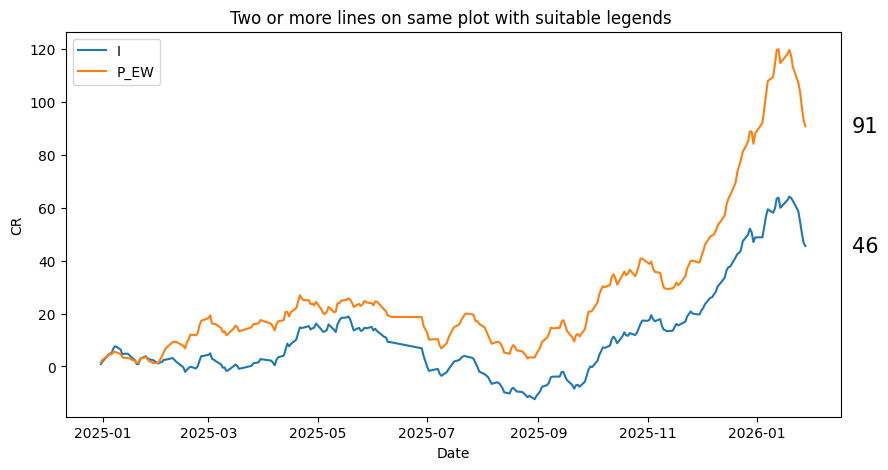

sharpe PO_EW:2.1091
sharpe III:0.9212
sortino PO_EW:2.9345
sortino III:1.26
max_drawdown PO_EW:-0.1885
max_drawdown III:-0.2634
calmar, alpha, beta-P_EW:[2.48 0.29 0.97]
calmar, alpha, beta-III:[0.72 0.   1.  ]


,return III,returnwq,cumluative_returnwq,cumluative_return III
D,,,,
2024-12-31,0.008988,0.015243,1.524308,0.898783
2025-01-01,0.010433,0.010321,2.572115,1.951448
2025-01-04,0.022140,0.015138,4.124897,4.208613
2025-01-05,0.006468,0.004954,4.640702,4.882601
2025-01-06,0.001354,-0.000450,4.593636,5.024661
...,...,...,...,...
2026-01-24,-0.023742,-0.027195,107.444717,58.794644
2026-01-25,-0.024485,-0.016622,103.996585,54.906488
2026-01-26,-0.028643,-0.029803,97.916878,50.469514


In [ ]:
dfind1 = df.loc[:, ~df.columns.str.contains('^Unnamed')]
#dfind3=dfind1.loc[str(datetime.datetime.today()-timedelta(days=3000)).split()[0]:str(datetime.datetime.today()-timedelta(days=0)).split()[0]]
dfind3=dfind1.loc[: , :]
'''dfind4=dfind3[(dfind3['T']=='KIMIA') | (dfind3['T']=='HORMOZ')| (dfind3['T']=='SAVEH')| (dfind3['T']=='FEOLAY')| (dfind3['T']=='FEOLAD')
       | (dfind3['T']=='FEKHOZ')| (dfind3['T']=='SHEGHASIR')| (dfind3['T']=='CEFANO')| (dfind3['T']=='JAMPILEN')| (dfind3['T']== 'SHETRAN')
       | (dfind3['T']=='FESEPA')|(dfind3['T']=='CEROOD')|(dfind3['T']=='SHRANOL')|(dfind3['T']=='FAJR')|(dfind3['T']=='FEROY')
       |(dfind3['T']=='SHARAK')|(dfind3['T']=='KHORASAN')|(dfind3['T']=='FEBAHONAR')|(dfind3['T']=='CEKHOOZ')|(dfind3['T']=='TEPIX')
       |(dfind3['T']=='FEMELI')|(dfind3['T']=='BUALI')|(dfind3['T']=='ZOB')|(dfind3['T']=='NOORI')|(dfind3['T']=='SHBASIR')
       |(dfind3['T']=='SHESADAF')|(dfind3['T']=='DELER')|(dfind3['T']=='SHBEHRAN')|(dfind3['T']=='CEKHAZAR')|(dfind3['T']=='SHAPNA')
       |(dfind3['T']=='GHSHAHD')|(dfind3['T']=='FEZARIN')|(dfind3['T']=='FENAVARD')|(dfind3['T']=='KAVEH')|(dfind3['T']=='CEOROUM')
       |(dfind3['T']=='SHKHARK')|(dfind3['T']=='SHPAS')|(dfind3['T']=='CEBAHAN')|(dfind3['T']=='SHEGOOYA')|(dfind3['T']=='CEGHARB')
       |(dfind3['T']=='CEPAHA')|(dfind3['T']=='SHAPDIS')|(dfind3['T']=='GHEAASHAHD')|(dfind3['T']=='GHEHEKMAT')|(dfind3['T']=='CESHARGH')
       |(dfind3['T']=='CEKORD')|(dfind3['T']=='GHEGOL')|(dfind3['T']=='SABZEVA')|(dfind3['T']=='PEKAVIR')|(dfind3['T']=='CEMAZAN')
       |(dfind3['T']=='CEARBIL')|(dfind3['T']=='CESHOMAL')|(dfind3['T']=='BEHPAK')|(dfind3['T']=='KEGOL')|(dfind3['T']=='KEGOHAR')
       |(dfind3['T']=='GHSHEKAR')|(dfind3['T']=='GHENISHA')|(dfind3['T']=='KESERAM')|(dfind3['T']=='ARYA')|(dfind3['T']=='DEFRAA')
       |(dfind3['T']=='DETMAD')|(dfind3['T']=='FEOLAJH')|(dfind3['T']=='MAROON')|(dfind3['T']=='JAM')|(dfind3['T']=='KECHAD')
       |(dfind3['T']=='PARS')|(dfind3['T']=='SHIRAZ')|(dfind3['T']=='VABEMELAT')|(dfind3['T']=='SHRANGI')|(dfind3['T']=='KHODRO')
       |(dfind3['T']=='KHSAAPA')|(dfind3['T']=='ZAGROS')|(dfind3['T']=='SHBANDAR')|(dfind3['T']=='ZEPARS')|(dfind3['T']=='ZEGHIAM')]'''

#dfind4=dfind3[(dfind3['T']=='FEMELI') | (dfind3['T']=='FEKHOZ')| (dfind3['T']=='ZAGROS')| (dfind3['T']=='KEGOL')
               #| (dfind3['T']=='FEOLAD')| (dfind3['T']=='TEPIX')]
'''dfind4=dfind3[(dfind3['<TICKER>']=='فملي') | (dfind3['<TICKER>']=='فخوز')|(dfind3['<TICKER>']=='فولاد')|
 (dfind3['<TICKER>']=='كگل')| (dfind3['<TICKER>']=='شاخص كل6')]'''
'''dfind4=dfind3[(dfind3['<TICKER>']=='فملي') | (dfind3['<TICKER>']=='پارسان')|(dfind3['<TICKER>']=='فولاد')|
 (dfind3['<TICKER>']=='وبشهر')|(dfind3['<TICKER>']=='ومعادن')|
              (dfind3['<TICKER>']=='وغدیر')|(dfind3['<TICKER>']=='وساپا')|
              (dfind3['<TICKER>']=='رمپنا')|(dfind3['<TICKER>']=='سفارس')|
               (dfind3['<TICKER>']=='وبملت')| (dfind3['<TICKER>']=='تاپیکو')|
                (dfind3['<TICKER>']=='فارس')| (dfind3['<TICKER>']=='تیپیکو')|
                   (dfind3['<TICKER>']=='فارس')|(dfind3['<TICKER>']=='شاخص كل6')]'''
"""dfind4=dfind3[(dfind3['<TICKER>']=='فملي') | (dfind3['<TICKER>']=='پارسان')|(dfind3['<TICKER>']=='فولاد')|
 (dfind3['<TICKER>']=='وبشهر')|(dfind3['<TICKER>']=='ومعادن')|
              (dfind3['<TICKER>']=='وغدير')|(dfind3['<TICKER>']=='وساپا')|
              (dfind3['<TICKER>']=='رمپنا')|(dfind3['<TICKER>']=='سفارس')|
               (dfind3['<TICKER>']=='وبملت')| (dfind3['<TICKER>']=='تاپيكو')|
                (dfind3['<TICKER>']=='فارس')| (dfind3['<TICKER>']=='تيپيكو')|
                   (dfind3['<TICKER>']=='وبانك')|(dfind3['<TICKER>']=='شاخص كل6')]

dfind4=dfind3[(dfind3['<TICKER>']=='فملي') | (dfind3['<TICKER>']=='وبملت')|(dfind3['<TICKER>']=='فولاد')|
 (dfind3['<TICKER>']=='فارس')|(dfind3['<TICKER>']=='نوري')| (dfind3['<TICKER>']=='شاخص كل6')]"""

"""tickers = [
    'بوعلي', 'تاصيكو', 'تاپيكو', 'جم', 'حكشتي', 'خساپا', 'خودرو', 'رمپنا',
    'شاخص كل6', 'شبريز', 'شبندر', 'شتران', 'شستا', 'شپديس', 'شپنا',
    'فارس', 'فملي', 'فولاد', 'كچاد', 'كگل', 'مبين', 'نوري', 'واميد',
    'وبملت', 'وتجارت', 'وصندوق', 'وغدير', 'ومعادن', 'وپاسار',
    'پارس', 'پارسان'
]"""
tickers = [
     'تاصيكو', 'جم',
    'شاخص كل6', 'شبريز', 'شبندر', 'شپديس',
     'فملي', 'مبين', 'نوري',
    'پارس', 'پارسان'
]

dfind4 = dfind3[dfind3['<TICKER>'].isin(tickers)]

dfind4=dfind4.reset_index()
dfind4.columns=['D','T','O','H','L','C','V','COL1','COL2','COL4']
#df57['D']=pd.to_datetime(df57['D'])
z=dfind4.groupby('T')['D'].apply(lambda x: x.count())
z=pd.DataFrame(z)
z=z.rename(columns={"D": "z"})
vk=z[z['z']>252]['z']
vk=pd.DataFrame(vk)
dfind4=dfind4.set_index('T')
dfind5=dfind4.join(vk,how='inner')
dfind5=dfind5.reset_index()
dfind5=dfind5.set_index('D')
warm=252
bb=21
result35=[]

#df4=df4.ix[str(datetime.datetime.today()-timedelta(days=5000)).split()[0]:str(datetime.datetime.today()-timedelta(days=245))
dftt3=dfind5[['T','C']]

#dft1=dft.groupby('T').resample('D').last()

dfind6=dftt3.reset_index().pivot_table(values='C', index=['D'], columns='T', aggfunc='mean')
dfind7=dfind6.fillna(method='ffill')
WWW=[]
initial_capital = float(1000)
initial_capital1=float(1000)
poh=list(dfind7.columns)
poh.remove("شاخص كل6")
W0=(len(list(poh)))*[ 1./(len(list(poh))),]
W0 = [element * 0 for element in W0]
for f in range(0,warm,bb):
    dfind8=dfind7[0:dfind7.shape[0]-warm+f]
    rets11= (dfind8/dfind8.shift(1))-1
    rets11=rets11[list(rets11.columns)]




    rets11=rets11.dropna()
#rets11=rets11[~((rets11-rets11.mean()).abs() > 3*rets11.std())]
    #q_low = rets11.quantile(0.0015)
    #q_hi  = rets11.quantile(0.9985)
    #rets11 = rets11[(rets11 < q_hi) & (rets11 > q_low)]
    #rets11=rets11.dropna()
    rff=0.21
    Te=252
    rets=rets11.drop(columns=['شاخص كل6'])
    retstep=pd.DataFrame(rets11['شاخص كل6'],columns=['شاخص كل6'])
    br=(tuple(0.0088 for x in range(len(list(rets)))))
    cr=(tuple(0 for x in range(len(list(rets)))))
    dr=(tuple(0.00371 for x in range(len(list(rets)))))
    er=(tuple(0 for x in range(len(list(rets)))))
#W0=[0.248388336,0.143041775,0.120202658,0.115110052,
   # 0.074132915,0.067111938,0.048815788,0.044103681,
   # 0.032585542,0.031213032,0.029160613,0.026537302,
   # 0.012718921,0.003810042,0.003066463,0.000000940,
  #  0.000000002,0.000000000,0.000000000,
#]
    #W0=(len(list(rets)))*[ 1./(len(list(rets)))]
    br=np.array(br)
    cr=np.array(cr)
    dr=np.array(dr)
    er=np.array(er)


    weights=(len(list(rets)))*[ 1./(len(list(rets)))]

    result1=pd.DataFrame(weights, index=list(rets),columns=['weightseq'])
    result35.append(result1)
    cost=list(np.array(result1['weightseq'].values) - np.array(W0))
    co.append(cost)
    #W0=list(result1['weights in BLSharp'].values)
    cocd=[element * 0.00371 if element>=0  else abs(element) * 0.0088   for element in cost]
    cocod=sum(cocd)

#print(opts['x'].round(3),(list(dft2)))
#print(statistics(opts['x']).round(3))
#pd.set_option('display.max_rows', 100000)
#pd.set_option('expand_frame_repr', False)
#print(result)

#.loc[(result4!=0).any(axis=1)]
    dftes=dfind7[dfind7.shape[0]-warm+f:dfind7.shape[0]-warm+f+bb]
    resultorg23=result1
    #dftes=dftes.fillna(method='ffill')
    #dftes=dftes.fillna(method='bfill')
    cap=initial_capital*resultorg23['weightseq'].values
    hj=(dftes/dftes.shift(1))
    hj=hj.drop(columns=['شاخص كل6'])
    positions=pd.DataFrame(index=hj.index,columns=hj.columns).fillna(0.0)

    #positions=positions.set_index('D')
    #(positions.head(1)).mul(float(cap))
    r=(positions.head(1))+cap
    pd.concat([r,hj])
    hjj=hj.drop(hj.index[:1])
    kl=pd.concat([r,hjj])
    kll=kl.cumprod(skipna=True)
    #kll=kll.fillna(method='ffill')
    kll=kll.fillna(method='ffill')
    #kll=kll.fillna(method='bfill')
    #rf=0.21/252
    kll['hold']=kll.sum(axis=1)
    rf=0.21/252
    rr=float(r.sum(axis=1).values)
    kll['cash']=0
    kll['cash']=(initial_capital-kll['hold'])
    kll['cash']=kll['cash'].copy()
    for d in range(1,len(kll.index)):
         kll['cash'].iloc[d]=(1+rf)

    kll['cashcum']=kll['cash'].cumprod()
    kll['port']=kll['cashcum']+kll['hold']
    initial_capital =kll['port'].iloc[-1]
    W0=list((kll[rets.columns].iloc[-1]/kll['port'].iloc[-1]).values)
    kll['port'][0]=kll['port'][0]-cocod*kll['port'][0]
    WWW.append(kll)

klll=pd.concat(WWW)
klll

klll


klll['returnwq']=(klll['port']/klll['port'].shift(1))-1
df1117=pd.DataFrame(dftt3[dftt3['T']=='شاخص كل6'])
df1117=df1117.reset_index()
df1117=df1117.set_index('D')
df1117['return']=(df1117['C']/df1117['C'].shift(1))-1
df1117=df1117[df1117.shape[0]-warm+1:df1117.shape[0]-0]

df1117['return III']=(df1117['C']/df1117['C'].shift(1))-1



df11177=pd.DataFrame(df1117['return III'].dropna())
rts1=pd.DataFrame(klll['returnwq'].dropna())
rts2=rts1.reset_index()
df11122=df11177.reset_index()
df11133=df11122.set_index('D').join(rts2.set_index('D'))
#df11133=df11133.dropna()
df11133['cumluative_returnwq'] = ((np.exp(np.log1p(df11133['returnwq']).cumsum()))-1)*100
df11133['cumluative_return III'] = ((np.exp(np.log1p(df11133['return III']).cumsum()))-1)*100
# plotting the line 1 points
fig=plt.figure(figsize = (10, 5))
plt.plot(df11133['cumluative_return III'].dropna(), label = "I")
plt.plot(df11133['cumluative_returnwq'].dropna(), label = "P_EW")
for var in list(['cumluative_return III','cumluative_returnwq']):
    plt.annotate('%0.0f' % df11133[var].iloc[-1], xy=(1, df11133[var].iloc[-1]), xytext=(8, 0),
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=15, va="center")
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('CR')
# Set a title of the current axes.
plt.title('Two or more lines on same plot with suitable legends ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

def semivol(returns):
    meanxx=np.mean(returns,axis=0)
    returnss=returns-meanxx
    lenxind=returnss.shape[0]
    for i in range(lenxind):
        if returnss.iloc[i]>0:
               returnss.loc[:][i]=0
    semivol=(returnss.T.dot(returnss))/(lenxind-1)
    return semivol
#


def sharpe(returns, rf, days):
    volatility = returns.std() * np.sqrt(days)
    sharpe_ratio = (returns.mean()*days - rf) / volatility
    return sharpe_ratio
def sortino(returns, rf, days):
    volsemi = np.sqrt(semivol(returns))* np.sqrt(days)
    sortino_ratio = (returns.mean()*days - rf) / volsemi
    return sortino_ratio
def max_drawdown(return_series):
    comp_ret = pd.Series((return_series+1).cumprod())
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret/peak)-1
    return dd.min()
import statsmodels.api as sm
from statsmodels import regression
def print_stats(result, benchmark,rf, days):
    max_draw=max_drawdown(np.array(result))
    returns = np.mean(np.array(result)*days)
    volatility = np.std(np.array(result)*np.sqrt(days))
    calmars = (returns-rf)/abs(max_draw)

    X = benchmark
    y = result
    x = sm.add_constant(X)
    model = regression.linear_model.OLS(y, x).fit()
    alpha = model.params[0]
    beta = model.params[1]
    return np.round(np.array([calmars, alpha*252, beta]), 4)
print('sharpe PO_EW:'+ str(round(sharpe(returns=(df11133['returnwq'].dropna()), rf=0.21, days=252),4)))
print('sharpe III:'+ str(round(sharpe(returns=(df11133['return III'].dropna()), rf=0.21, days=252),4)))
print('sortino PO_EW:'+ str(round(sortino(returns=(df11133['returnwq'].dropna()), rf=0.21, days=252),4)))
print('sortino III:'+ str(round(sortino(returns=(df11133['return III'].dropna()), rf=0.21, days=252),4)))
print('max_drawdown PO_EW:'+ str(round(max_drawdown(return_series=(df11133['returnwq'].dropna())),4)))
print('max_drawdown III:'+ str(round(max_drawdown(return_series=(df11133['return III'].dropna())),4)))
print('calmar, alpha, beta-P_EW:'+ str((print_stats(result=(df11133['returnwq'].dropna()),benchmark=df11133['return III'].dropna(), rf=0.21, days=252)).round(2)))
print('calmar, alpha, beta-III:'+ str((print_stats(result=(df11133['return III'].dropna()),benchmark=df11133['return III'].dropna(), rf=0.21, days=252)).round(2)))
df11133.to_excel(r'C:\Users\amin\Desktop\pypi\OUT10.xlsx', index ='سهم', header=True)
df111336=df11133[['returnwq','cumluative_returnwq']]
df11133

In [ ]:
dict_keys(['تاپيكو', 'تيپيكو', 'رمپنا', 'سفارس', 'شاخص كل6', 'فارس', 'فملي', 'فولاد', 'وبانك', 'وبشهر', 'وبملت', 'وساپا', 'وغدير', 'ومعادن', 'پارسان'])

In [ ]:
result35

In [ ]:
!pip install cvxpy

In [ ]:
!pip install ECOS

Turnover: 1.0
Turnover: 0.010583186915392138
Turnover: 0.027690904597003282
Turnover: 0.006286980857027613
Turnover: 0.010290330856181855
Turnover: 0.013706814373481903
Turnover: 0.005612771359824402
Turnover: 0.007959334844593907
Turnover: 0.004632128610729924
Turnover: 0.008852306345083341
Turnover: 0.011114463375195817
Turnover: 0.013483923969018666


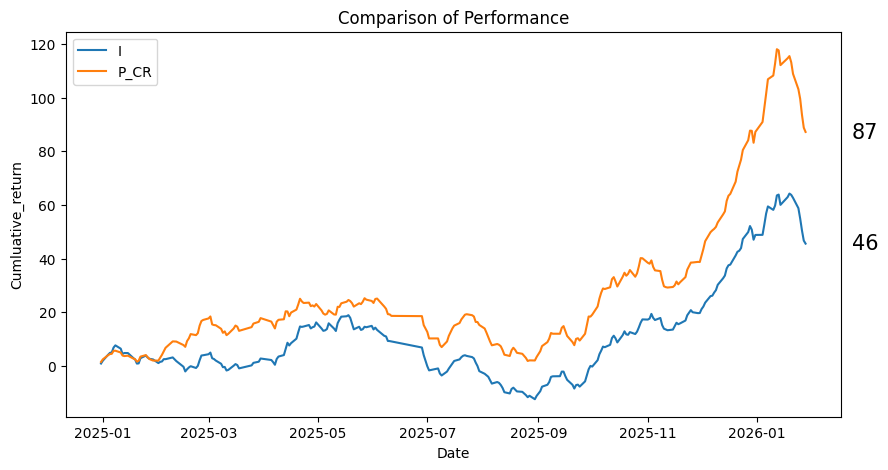

sharpe PO_CR:2.0786
sharpe III:0.9212
sortino PO_CR:2.9002
sortino III:1.26
max_drawdown PO_CR:-0.1867
max_drawdown III:-0.2634
calmar, alpha, beta-P_CR:[2.39 0.28 0.94]
calmar, alpha, beta-III:[0.72 0.   1.  ]


,return III,returncr,cumluative_returncr,cumluative_return III
D,,,,
2024-12-31,0.008988,0.015016,1.501558,0.898783
2025-01-01,0.010433,0.009423,2.458026,1.951448
2025-01-04,0.022140,0.015376,4.033388,4.208613
2025-01-05,0.006468,0.003858,4.434743,4.882601
2025-01-06,0.001354,0.000749,4.512962,5.024661
...,...,...,...,...
2026-01-24,-0.023742,-0.027417,103.135314,58.794644
2026-01-25,-0.024485,-0.017806,99.518240,54.906488
2026-01-26,-0.028643,-0.029805,93.571683,50.469514


In [ ]:
dfind1 = df.loc[:, ~df.columns.str.contains('^Unnamed')]
from datetime import timedelta
#dfind3=dfind1.loc[str(datetime.datetime.today()-timedelta(days=1000)).split()[0]:str(datetime.datetime.today()-timedelta(days=0)).split()[0]]
dfind3=dfind1.loc[: , :]

'''dfind4=dfind3[(dfind3['T']=='KIMIA') | (dfind3['T']=='HORMOZ')| (dfind3['T']=='SAVEH')| (dfind3['T']=='FEOLAY')| (dfind3['T']=='FEOLAD')
       | (dfind3['T']=='FEKHOZ')| (dfind3['T']=='SHEGHASIR')| (dfind3['T']=='CEFANO')| (dfind3['T']=='JAMPILEN')| (dfind3['T']== 'SHETRAN')
       | (dfind3['T']=='FESEPA')|(dfind3['T']=='CEROOD')|(dfind3['T']=='SHRANOL')|(dfind3['T']=='FAJR')|(dfind3['T']=='FEROY')
       |(dfind3['T']=='SHARAK')|(dfind3['T']=='KHORASAN')|(dfind3['T']=='FEBAHONAR')|(dfind3['T']=='CEKHOOZ')|(dfind3['T']=='TEPIX')
       |(dfind3['T']=='FEMELI')|(dfind3['T']=='BUALI')|(dfind3['T']=='ZOB')|(dfind3['T']=='NOORI')|(dfind3['T']=='SHBASIR')
       |(dfind3['T']=='SHESADAF')|(dfind3['T']=='DELER')|(dfind3['T']=='SHBEHRAN')|(dfind3['T']=='CEKHAZAR')|(dfind3['T']=='SHAPNA')
       |(dfind3['T']=='GHSHAHD')|(dfind3['T']=='FEZARIN')|(dfind3['T']=='FENAVARD')|(dfind3['T']=='KAVEH')|(dfind3['T']=='CEOROUM')
       |(dfind3['T']=='SHKHARK')|(dfind3['T']=='SHPAS')|(dfind3['T']=='CEBAHAN')|(dfind3['T']=='SHEGOOYA')|(dfind3['T']=='CEGHARB')
       |(dfind3['T']=='CEPAHA')|(dfind3['T']=='SHAPDIS')|(dfind3['T']=='GHEAASHAHD')|(dfind3['T']=='GHEHEKMAT')|(dfind3['T']=='CESHARGH')
       |(dfind3['T']=='CEKORD')|(dfind3['T']=='GHEGOL')|(dfind3['T']=='SABZEVA')|(dfind3['T']=='PEKAVIR')|(dfind3['T']=='CEMAZAN')
       |(dfind3['T']=='CEARBIL')|(dfind3['T']=='CESHOMAL')|(dfind3['T']=='BEHPAK')|(dfind3['T']=='KEGOL')|(dfind3['T']=='KEGOHAR')
       |(dfind3['T']=='GHSHEKAR')|(dfind3['T']=='GHENISHA')|(dfind3['T']=='KESERAM')|(dfind3['T']=='ARYA')|(dfind3['T']=='DEFRAA')
       |(dfind3['T']=='DETMAD')|(dfind3['T']=='FEOLAJH')|(dfind3['T']=='MAROON')|(dfind3['T']=='JAM')|(dfind3['T']=='KECHAD')
       |(dfind3['T']=='PARS')|(dfind3['T']=='SHIRAZ')|(dfind3['T']=='VABEMELAT')|(dfind3['T']=='SHRANGI')|(dfind3['T']=='KHODRO')
       |(dfind3['T']=='KHSAAPA')|(dfind3['T']=='ZAGROS')|(dfind3['T']=='SHBANDAR')|(dfind3['T']=='ZEPARS')|(dfind3['T']=='ZEGHIAM')]'''

#dfind4=dfind3[(dfind3['T']=='FEMELI') | (dfind3['T']=='FEKHOZ')| (dfind3['T']=='ZAGROS')| (dfind3['T']=='KEGOL')
               #| (dfind3['T']=='FEOLAD')| (dfind3['T']=='TEPIX')]

'''dfind4=dfind3[(dfind3['<TICKER>']=='فملي') | (dfind3['<TICKER>']=='فخوز')|(dfind3['<TICKER>']=='فولاد')|
 (dfind3['<TICKER>']=='كگل')| (dfind3['<TICKER>']=='شاخص كل6')]'''

"""dfind4=dfind3[(dfind3['<TICKER>']=='فملي') | (dfind3['<TICKER>']=='پارسان')|(dfind3['<TICKER>']=='فولاد')|
 (dfind3['<TICKER>']=='وبشهر')|(dfind3['<TICKER>']=='ومعادن')|
              (dfind3['<TICKER>']=='وغدير')|(dfind3['<TICKER>']=='وساپا')|
              (dfind3['<TICKER>']=='رمپنا')|(dfind3['<TICKER>']=='سفارس')|
               (dfind3['<TICKER>']=='وبملت')| (dfind3['<TICKER>']=='تاپيكو')|
              (dfind3['<TICKER>']=='فارس')| (dfind3['<TICKER>']=='تيپيكو')|
              (dfind3['<TICKER>']=='نوري') |  (dfind3['<TICKER>']=='واميد')|
              (dfind3['<TICKER>']=='شستا')|(dfind3['<TICKER>']=='شپنا')| (dfind3['<TICKER>']=='وبانك')|(dfind3['<TICKER>']=='شاخص كل6')]




dfind4=dfind3[(dfind3['<TICKER>']=='فملي') | (dfind3['<TICKER>']=='وبملت')|(dfind3['<TICKER>']=='فولاد')|
 (dfind3['<TICKER>']=='فارس')|(dfind3['<TICKER>']=='نوري')| (dfind3['<TICKER>']=='شاخص كل6')]"""
"""tickers = [
    'بوعلي', 'تاصيكو', 'تاپيكو', 'جم', 'حكشتي', 'خساپا', 'خودرو', 'رمپنا',
    'شاخص كل6', 'شبريز', 'شبندر', 'شتران', 'شستا', 'شپديس', 'شپنا',
    'فارس', 'فملي', 'فولاد', 'كچاد', 'كگل', 'مبين', 'نوري', 'واميد',
    'وبملت', 'وتجارت', 'وصندوق', 'وغدير', 'ومعادن', 'وپاسار',
    'پارس', 'پارسان'
]"""
tickers = [
     'تاصيكو', 'جم',
    'شاخص كل6', 'شبريز', 'شبندر', 'شپديس',
     'فملي', 'مبين', 'نوري',
    'پارس', 'پارسان'
]

dfind4 = dfind3[dfind3['<TICKER>'].isin(tickers)]

warm=252
dfind4=dfind4.reset_index()
dfind4.columns=['D','T','O','H','L','C','V','COL1','COL2','COL4']
#df57['D']=pd.to_datetime(df57['D'])
z=dfind4.groupby('T')['D'].apply(lambda x: x.count())
z=pd.DataFrame(z)
z=z.rename(columns={"D": "z"})
vk=z[z['z']>252]['z']
vk=pd.DataFrame(vk)
dfind4=dfind4.set_index('T')
dfind5=dfind4.join(vk,how='inner')
dfind5=dfind5.reset_index()
dfind5=dfind5.set_index('D')
bb=21



#df4=df4.ix[str(datetime.datetime.today()-timedelta(days=5000)).split()[0]:str(datetime.datetime.today()-timedelta(days=245))
dftt3=dfind5[['T','C']]

#dft1=dft.groupby('T').resample('D').last()

dfind6=dftt3.reset_index().pivot_table(values='C', index=['D'], columns='T', aggfunc='mean')
dfind7=dfind6.fillna(method='ffill')
WWW=[]
co=[]
initial_capital = float(1000)
initial_capital1=float(1000)
poh=list(dfind7.columns)
poh.remove('شاخص كل6')
W0=(len(list(poh)))*[ 1./(len(list(poh))),]
W0 = [element * 0 for element in W0]
result35=[]
x1=W0

for f in range(0,warm,bb):
    dfind8=dfind7[0:dfind7.shape[0]-warm+f]
    rets11= (dfind8/dfind8.shift(1))-1
    rets11=rets11[list(rets11.columns)]




    rets11=rets11.dropna()
#rets11=rets11[~((rets11-rets11.mean()).abs() > 3*rets11.std())]
    #q_low = rets11.quantile(0.0015)
   # q_hi  = rets11.quantile(0.9985)
   # rets11 = rets11[(rets11 < q_hi) & (rets11 > q_low)]
    #rets11=rets11.dropna()
    rff=0.21
    Te=252
    rets=rets11.drop(columns=['شاخص كل6'])
    retstep=pd.DataFrame(rets11['شاخص كل6'],columns=['شاخص كل6'])
    br=(tuple(0.0088 for x in range(len(list(rets)))))
    cr=(tuple(0 for x in range(len(list(rets)))))
    dr=(tuple(0.00371 for x in range(len(list(rets)))))
    er=(tuple(0 for x in range(len(list(rets)))))
#W0=[0.248388336,0.143041775,0.120202658,0.115110052,
   # 0.074132915,0.067111938,0.048815788,0.044103681,
   # 0.032585542,0.031213032,0.029160613,0.026537302,
   # 0.012718921,0.003810042,0.003066463,0.000000940,
  #  0.000000002,0.000000000,0.000000000,
#]
    #W0=(len(list(rets)))*[ 1./(len(list(rets)))]
    #W0 = [element * 0 for element in W0]
    br=np.array(br)
    cr=np.array(cr)
    dr=np.array(dr)
    er=np.array(er)

    numAssets = len(rets.columns)
    LB = np.zeros((1,numAssets))
    Aeq = np.ones((1,numAssets))
    Beq = 1
    import cvxpy as cp
    #import ECOS
    A = rets.values
    b = retstep.values
    turnover_limit = 1
    b = np.squeeze(b)
    x = cp.Variable(A.shape[1])
    lower_bounds = 0.01 * np.ones(A.shape[1])
    upper_bounds = 1 * np.ones(A.shape[1])

    objective = cp.Minimize(0.5 * cp.sum_squares(A@x-b))
    if all(x1)==all(np.zeros(A.shape[1])):
        constraints = [x >= 0, x <= 1,sum(x)==1,x >= lower_bounds,
               x <= upper_bounds]
    else:
         constraints = [x >= 0, x <= 1,sum(x)==1,x >= lower_bounds,
               x <= upper_bounds,  cp.norm1(x - x1) <= turnover_limit]

    prob = cp.Problem(objective, constraints)
    resultrt = prob.solve()

    intercept = x.value[0]
    #print("Sum weights:", np.sum(x.value))
    print("Turnover:", np.sum(np.abs(x.value - x1)))
    x1=x.value
    result1=pd.DataFrame(x.value,index=rets.columns,columns=['wts'])


#print(opts['x'].round(3),(list(dft2)))
#print(statistics(opts['x']).round(3))
#pd.set_option('display.max_rows', 100000)
#pd.set_option('expand_frame_repr', False)
#print(result)
    result35.append(result1)
    cost=list(np.array(result1['wts'].values) - np.array(W0))
    co.append(cost)
    #W0=list(result1['weights in BLSharp'].values)
    cocd=[element * 0.00371 if element>=0  else abs(element) * 0.0088   for element in cost]
    cocod=sum(cocd)
#print(result6)
#print(result1)
    #print(resultorg)
#print(result4)
    #print(resultorg1)
#print(result5)
    #print(resultorg2)
#print(result7)



  #.loc[(result4!=0).any(axis=1)]
    dftes=dfind7[dfind7.shape[0]-warm+f:dfind7.shape[0]-warm+f+bb]
    resultorg23=result1
    #dftes=dftes.fillna(method='ffill')
    #dftes=dftes.fillna(method='bfill')
    cap=initial_capital*resultorg23['wts'].values
    hj=(dftes/dftes.shift(1))
    hj=hj.drop(columns=['شاخص كل6'])
    positions=pd.DataFrame(index=hj.index,columns=hj.columns).fillna(0.0)

    #positions=positions.set_index('D')
    #(positions.head(1)).mul(float(cap))
    r=(positions.head(1))+cap
    pd.concat([r,hj])
    hjj=hj.drop(hj.index[:1])
    kl=pd.concat([r,hjj])
    kll=kl.cumprod(skipna=True)
    #kll=kll.fillna(method='ffill')
    kll=kll.fillna(method='ffill')
    #kll=kll.fillna(method='bfill')
    #rf=0.21/252
    kll['hold']=kll.sum(axis=1)
    rf=0.21/252
    rr=float(r.sum(axis=1).values)
    kll['cash']=0
    kll['cash']=(initial_capital-kll['hold'])
    kll['cash']=kll['cash'].copy()
    for d in range(1,len(kll.index)):
         kll['cash'].iloc[d]=(1+rf)

    kll['cashcum']=kll['cash'].cumprod()
    kll['port']=kll['cashcum']+kll['hold']
    initial_capital =kll['port'].iloc[-1]
    W0=list((kll[rets.columns].iloc[-1]/kll['port'].iloc[-1]).values)
    kll['port'][0]=kll['port'][0]-cocod*kll['port'][0]
    WWW.append(kll)

klll=pd.concat(WWW)
klll

klll


#coco=[]
#for d in range(len(co)):
    #coc=[element * 0.00371 if element>=0  else abs(element) * 0.0088   for element in co[d]]
    #cocoo=sum(coc)
    #coco.append(cocoo)
klll['returncr']=(klll['port']/klll['port'].shift(1))-1
df1117=pd.DataFrame(dftt3[dftt3['T']=='شاخص كل6'])
df1117=df1117.reset_index()
df1117=df1117.set_index('D')
df1117['return']=(df1117['C']/df1117['C'].shift(1))-1
df1117=df1117[df1117.shape[0]-warm+1:df1117.shape[0]-0]

df1117['return III']=(df1117['C']/df1117['C'].shift(1))-1


df11177=pd.DataFrame(df1117['return III'].dropna())
rts1=pd.DataFrame(klll['returncr'].dropna())
rts2=rts1.reset_index()
df11122=df11177.reset_index()
df11133=df11122.set_index('D').join(rts2.set_index('D'))
#for s in range(0,len(df11133['return']),bb):
     #df11133['return'][s]=df11133['return'][s]-coco[int(s/bb)]
#df11133=df11133.dropna()
df11133['cumluative_returncr'] = ((np.exp(np.log1p(df11133['returncr']).cumsum()))-1)*100
df11133['cumluative_return III'] = ((np.exp(np.log1p(df11133['return III']).cumsum()))-1)*100
# plotting the line 1 points
fig=plt.figure(figsize = (10, 5))
plt.plot(df11133['cumluative_return III'].dropna(), label = "I")
plt.plot(df11133['cumluative_returncr'].dropna(), label = "P_CR")
for var in list(['cumluative_return III','cumluative_returncr']):
    plt.annotate('%0.0f' % df11133[var].iloc[-1], xy=(1, df11133[var].iloc[-1]), xytext=(8, 0),
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=15, va="center")
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('Cumluative_return')
# Set a title of the current axes.
plt.title('Comparison of Performance')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

def semivol(returns):
    meanxx=np.mean(returns,axis=0)
    returnss=returns-meanxx
    lenxind=returnss.shape[0]
    for i in range(lenxind):
        if returnss.iloc[i]>0:
               returnss.loc[:][i]=0
    semivol=(returnss.T.dot(returnss))/(lenxind-1)
    return semivol
#


def sharpe(returns, rf, days):
    volatility = returns.std() * np.sqrt(days)
    sharpe_ratio = (returns.mean()*days - rf) / volatility
    return sharpe_ratio
def sortino(returns, rf, days):
    volsemi = np.sqrt(semivol(returns))* np.sqrt(days)
    sortino_ratio = (returns.mean()*days - rf) / volsemi
    return sortino_ratio

def max_drawdown(return_series):
    comp_ret = pd.Series((return_series+1).cumprod())
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret/peak)-1
    return dd.min()
import statsmodels.api as sm
from statsmodels import regression
def print_stats(result, benchmark,rf, days):
    max_draw=max_drawdown(np.array(result))
    returns = np.mean(np.array(result)*days)
    volatility = np.std(np.array(result)*np.sqrt(days))
    calmars = (returns-rf)/abs(max_draw)

    X = benchmark
    y = result
    x = sm.add_constant(X)
    model = regression.linear_model.OLS(y, x).fit()
    alpha = model.params[0]
    beta = model.params[1]
    return np.round(np.array([calmars, alpha*252, beta]), 4)
print('sharpe PO_CR:'+ str(round(sharpe(returns=(df11133['returncr'].dropna()), rf=0.21, days=252),4)))
print('sharpe III:'+ str(round(sharpe(returns=(df11133['return III'].dropna()), rf=0.21, days=252),4)))
print('sortino PO_CR:'+ str(round(sortino(returns=(df11133['returncr'].dropna()), rf=0.21, days=252),4)))
print('sortino III:'+ str(round(sortino(returns=(df11133['return III'].dropna()), rf=0.21, days=252),4)))
print('max_drawdown PO_CR:'+ str(round(max_drawdown(return_series=(df11133['returncr'].dropna())),4)))
print('max_drawdown III:'+ str(round(max_drawdown(return_series=(df11133['return III'].dropna())),4)))
print('calmar, alpha, beta-P_CR:'+ str((print_stats(result=(df11133['returncr'].dropna()),benchmark=df11133['return III'].dropna(), rf=0.21, days=252)).round(2)))
print('calmar, alpha, beta-III:'+ str((print_stats(result=(df11133['return III'].dropna()),benchmark=df11133['return III'].dropna(), rf=0.21, days=252)).round(2)))
df11133.to_excel(r'C:\Users\amin\Desktop\pypi\OUT10.xlsx', index ='سهم', header=True)
df111337=df11133[['returncr','cumluative_returncr','return III','cumluative_return III']]

df11133

In [ ]:
fa_to_en = {
    'بوعلي': 'Bouali Sina Petrochemical Co',
    'تاصيكو': 'Sadr Tamin Investment Co',
    'تاپيكو': 'Tamin Petroleum and Petrochemical Investment Co',
    'جم': 'Jam Petrochemical Co',
    'حكشتي': 'Islamic Republic of Iran Shipping Lines',
    'خساپا': 'Saipa Group',
    'خودرو': 'Iran Khodro Co',
    'رمپنا': 'Mapna Group',
    'شاخص كل6': 'TEDPIX Index',
    'شبريز': 'Tabriz Oil Refining Co',
    'شبندر': 'Bandar Abbas Oil Refining Co',
    'شتران': 'Tehran Oil Refining Co',
    'شستا': 'Social Security Investment Co',
    'شپديس': 'Pardis Petrochemical Co',
    'شپنا': 'Isfahan Oil Refining Co',
    'فارس': 'Persian Gulf Petrochemical Industries Co',
    'فملي': 'National Iranian Copper Industries Co',
    'فولاد': 'Mobarakeh Steel Co',
    'كچاد': 'Chadormalu Mining and Industrial Co',
    'كگل': 'Gol Gohar Mining and Industrial Co',
    'مبين': 'Mobin Energy Persian Gulf Co',
    'نوري': 'Nouri Petrochemical Co',
    'واميد': 'Omid Investment Management Group',
    'وبملت': 'Bank Mellat',
    'وتجارت': 'Bank Tejarat',
    'وصندوق': 'Sandogh Bazneshastegi Co',
    'وغدير': 'Ghadir Investment Co',
    'ومعادن': 'Mining and Metals Investment Co',
    'وپاسار': 'Pasargad Bank',
    'پارس': 'Pars Petrochemical Co',
    'پارسان': 'Parsian Oil and Gas Development Group'
}

dfind6 = dfind6.rename(columns=fa_to_en)

In [ ]:
returns= (dfind6/dfind6.shift(1))-1
mean=pd.DataFrame(returns.mean()*252, columns=['Average annual return'])
rf=0.21
risk=pd.DataFrame(returns.std()*np.sqrt(252),columns=['Annual risk'])
sharpe=pd.DataFrame((mean.values-rf)/risk.values,index=risk.index,columns=['Annual Sharpe'])
mr=mean.join(risk)
per=mr.join(sharpe)
per

per.to_excel('/content/drive/MyDrive/per.xlsx')
per

,Average annual return,Annual risk,Annual Sharpe
T,,,
Bouali Sina Petrochemical Co,0.481082,0.340712,0.795635
Sadr Tamin Investment Co,0.627532,0.327592,1.274548
Tamin Petroleum and Petrochemical Investment Co,0.394894,0.321871,0.574434
Jam Petrochemical Co,0.438685,0.255664,0.894475
Islamic Republic of Iran Shipping Lines,0.270398,0.340985,0.177127
Saipa Group,0.353639,0.349594,0.410874
Iran Khodro Co,0.292330,0.345318,0.238418
Mapna Group,0.389067,0.356639,0.502097
TEDPIX Index,0.389195,0.170679,1.049893


                                                 Optimal Sharpe Weights
T                                                                      
Bouali Sina Petrochemical Co                               9.310570e-17
Sadr Tamin Investment Co                                   2.693857e-01
Tamin Petroleum and Petrochemical Investment Co            1.054891e-16
Jam Petrochemical Co                                       6.554910e-17
Islamic Republic of Iran Shipping Lines                    4.262090e-16
Saipa Group                                                0.000000e+00
Iran Khodro Co                                             0.000000e+00
Mapna Group                                                6.332615e-17
TEDPIX Index                                               0.000000e+00
Tabriz Oil Refining Co                                     1.565497e-01
Bandar Abbas Oil Refining Co                               2.739829e-16
Tehran Oil Refining Co                                     0.000

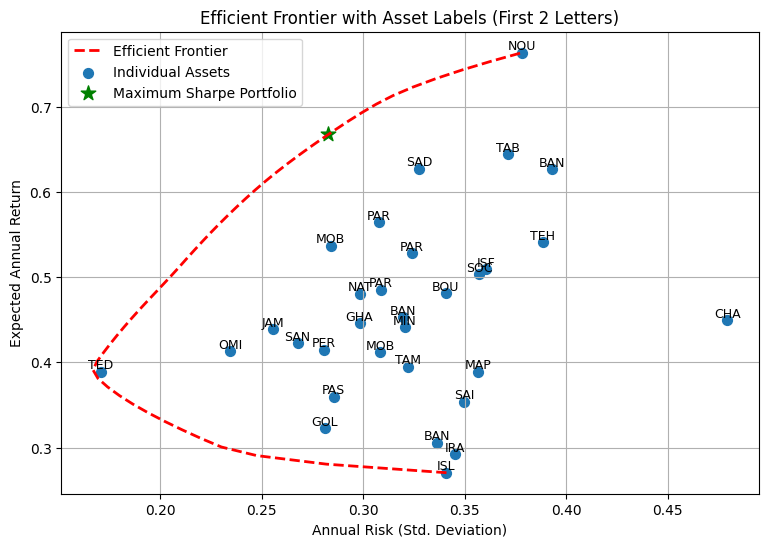

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# ===============================
# 1) Input Data (already defined)
# ===============================
# returns = (dfind6 / dfind6.shift(1)) - 1

rf = 0.21          # Risk-free rate (annual)
trading_days = 252

mean_returns = returns.mean() * trading_days
cov_matrix  = returns.cov() * trading_days
n_assets = len(mean_returns)

# ===============================
# 2) Portfolio Functions
# ===============================
def portfolio_return(weights):
    return np.dot(weights, mean_returns)

def portfolio_risk(weights):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

def sharpe_ratio(weights):
    return (portfolio_return(weights) - rf) / portfolio_risk(weights)

# ===============================
# 3) Efficient Frontier
#    Minimize risk for target return
# ===============================
def min_risk_for_target_return(target_return):
    constraints = (
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
        {'type': 'eq', 'fun': lambda w: portfolio_return(w) - target_return}
    )
    bounds = tuple((0, 1) for _ in range(n_assets))
    initial_weights = np.ones(n_assets) / n_assets

    result = minimize(
        portfolio_risk,
        initial_weights,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    return result

target_returns = np.linspace(mean_returns.min(), mean_returns.max(), 50)

ef_risk = []
ef_return = []

for tr in target_returns:
    res = min_risk_for_target_return(tr)
    ef_risk.append(res.fun)
    ef_return.append(tr)

# ===============================
# 4) Maximum Sharpe Ratio Portfolio
# ===============================
def negative_sharpe(weights):
    return -sharpe_ratio(weights)

constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
bounds = tuple((0, 1) for _ in range(n_assets))
initial_weights = np.ones(n_assets) / n_assets

opt_sharpe = minimize(
    negative_sharpe,
    initial_weights,
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

weights_sharpe = opt_sharpe.x
ret_sharpe  = portfolio_return(weights_sharpe)
risk_sharpe = portfolio_risk(weights_sharpe)

# ===============================
# 5) Optimal Portfolio Weights
# ===============================
weights_df = pd.DataFrame(
    weights_sharpe,
    index=returns.columns,
    columns=['Optimal Sharpe Weights']
)

print(weights_df)
print('\nAnnual Return (Sharpe Portfolio):', ret_sharpe)
print('Annual Risk (Sharpe Portfolio):', risk_sharpe)
print('Sharpe Ratio:', sharpe_ratio(weights_sharpe))

# ===============================
# 6) Plot Efficient Frontier
# ===============================
plt.figure(figsize=(9, 6))

# Efficient Frontier
plt.plot(ef_risk, ef_return, 'r--', linewidth=2, label='Efficient Frontier')

# Individual assets
plt.scatter(
    np.sqrt(np.diag(cov_matrix)),
    mean_returns,
    s=50,
    label='Individual Assets'
)

# Add labels: first 2 letters of each company
for i, ticker in enumerate(returns.columns):
    x = np.sqrt(cov_matrix.iloc[i, i])
    y = mean_returns[i]
    plt.text(x, y, ticker[:3].upper(), fontsize=9, ha='center', va='bottom')

# Maximum Sharpe point
plt.scatter(
    risk_sharpe,
    ret_sharpe,
    s=120,
    marker='*',
    color='green',
    label='Maximum Sharpe Portfolio'
)

plt.xlabel('Annual Risk (Std. Deviation)')
plt.ylabel('Expected Annual Return')
plt.title('Efficient Frontier with Asset Labels (First 2 Letters)')
plt.legend()
plt.grid(True)
plt.show()



                                                 Annual Mean Return  \
T                                                                     
Bouali Sina Petrochemical Co                               0.544215   
Sadr Tamin Investment Co                                  -0.039743   
Tamin Petroleum and Petrochemical Investment Co           -0.074625   
Jam Petrochemical Co                                       0.324481   
Islamic Republic of Iran Shipping Lines                   -0.493816   
Saipa Group                                               -0.554101   
Iran Khodro Co                                            -0.802681   
Mapna Group                                               -0.045654   
TEDPIX Index                                              -0.077202   
Tabriz Oil Refining Co                                    -0.211391   
Bandar Abbas Oil Refining Co                              -0.268589   
Tehran Oil Refining Co                                    -0.406201   
Social

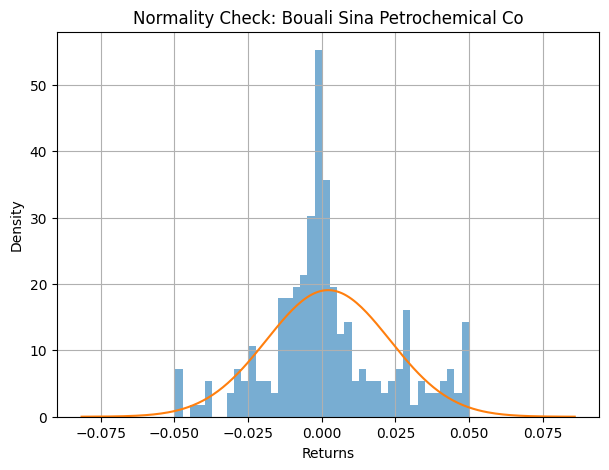

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# ======================================
# 1) Returns Calculation
# ======================================
returns = (dfind6 / dfind6.shift(1)) - 1
returns = returns.dropna()

# ======================================
# 2) Annualized Mean, Risk, Sharpe Ratio
# ======================================
rf = 0.21
trading_days = 252

mean = pd.DataFrame(
    returns.mean() * trading_days,
    columns=['Annual Mean Return']
)

risk = pd.DataFrame(
    returns.std() * np.sqrt(trading_days),
    columns=['Annual Risk']
)

sharpe = pd.DataFrame(
    (mean.values - rf) / risk.values,
    index=risk.index,
    columns=['Annual Sharpe Ratio']
)

mr = mean.join(risk)
per = mr.join(sharpe)

print(per)

# ======================================
# 3) Normality Tests
# ======================================

# ---- Jarque–Bera Test ----
jb_test = pd.DataFrame(
    columns=['JB Statistic', 'JB p-value']
)

# ---- Shapiro–Wilk Test ----
shapiro_test = pd.DataFrame(
    columns=['Shapiro Statistic', 'Shapiro p-value']
)

# ---- D’Agostino–Pearson Test ----
dagostino_test = pd.DataFrame(
    columns=['K² Statistic', 'K² p-value']
)

for col in returns.columns:
    data = returns[col].dropna()

    jb_stat, jb_p = stats.jarque_bera(data)
    sh_stat, sh_p = stats.shapiro(data)
    da_stat, da_p = stats.normaltest(data)

    jb_test.loc[col] = [jb_stat, jb_p]
    shapiro_test.loc[col] = [sh_stat, sh_p]
    dagostino_test.loc[col] = [da_stat, da_p]

print("\nJarque–Bera Test Results")
print(jb_test)

print("\nShapiro–Wilk Test Results")
print(shapiro_test)

print("\nD’Agostino–Pearson Test Results")
print(dagostino_test)

# ======================================
# 4) Combined Summary Table
# ======================================
normality_summary = per.join(
    jb_test[['JB p-value']]
).join(
    shapiro_test[['Shapiro p-value']]
).join(
    dagostino_test[['K² p-value']]
)

print("\nSummary with Normality Tests")
print(normality_summary)


# ======================================
# 5) Optional: Histogram + Normal Curve
# ======================================
asset = returns.columns[0]

mu = returns[asset].mean()
sigma = returns[asset].std()

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 200)

plt.figure(figsize=(7, 5))
plt.hist(returns[asset], bins=40, density=True, alpha=0.6)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title(f'Normality Check: {asset}')
plt.xlabel('Returns')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [ ]:
jb_test

,JB Statistic,JB p-value
Bouali Sina Petrochemical Co,4.252793,1.192663e-01
Sadr Tamin Investment Co,50.778628,9.409379e-12
Tamin Petroleum and Petrochemical Investment Co,37.022318,9.134940e-09
Jam Petrochemical Co,501.383089,1.336736e-109
Islamic Republic of Iran Shipping Lines,3.309726,1.911182e-01
Saipa Group,2.187763,3.349140e-01
Iran Khodro Co,4.372682,1.123270e-01
Mapna Group,8.248362,1.617674e-02
TEDPIX Index,53.085144,2.969665e-12
Tabriz Oil Refining Co,28.362163,6.938003e-07


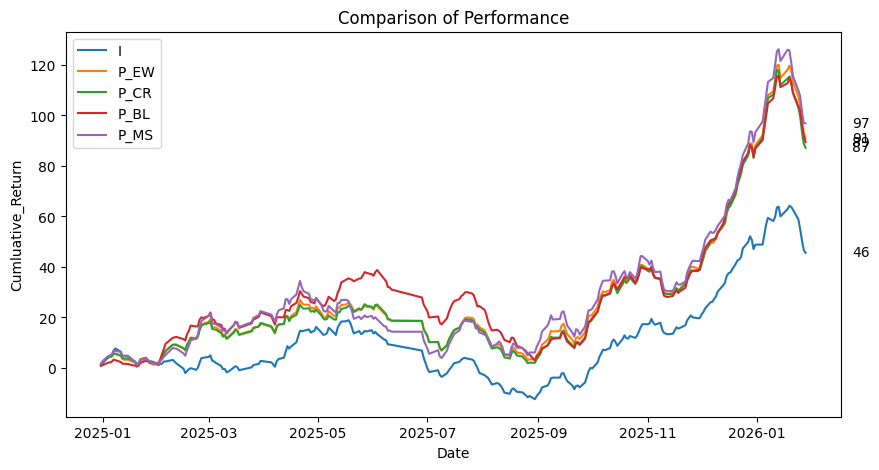

In [ ]:
df1113344=df111334.reset_index()
df1113355=df111335.reset_index()
df1113366=df111336.reset_index()
df1113377=df111337.reset_index()
df111334455=df1113355.set_index('D').join(df1113344.set_index('D'))
df11133445566=df1113366.set_index('D').join(df111334455)
df1113344556677=df1113377.set_index('D').join(df11133445566)
fig=plt.figure(figsize = (10, 5))
plt.plot(df1113344556677['cumluative_return III'].dropna(), label = "I")
plt.plot(df1113344556677['cumluative_returnwq'].dropna(), label = "P_EW")
plt.plot(df1113344556677['cumluative_returncr'].dropna(), label = "P_CR")
plt.plot(df1113344556677['cumluative_returnbl'].dropna(), label = "P_BL")
plt.plot(df1113344556677['cumluative_returnms'].dropna(), label = "P_MS")
for var in list(['cumluative_return III','cumluative_returnwq','cumluative_returncr','cumluative_returnbl','cumluative_returnms']):
    plt.annotate('%0.0f' % df1113344556677[var].iloc[-1], xy=(1, df1113344556677[var].iloc[-1]), xytext=(8, 0),
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=10, va="center")
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('Cumluative_Return')
# Set a title of the current axes.
plt.title('Comparison of Performance')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [ ]:
# Importing library
import scipy.stats as stats

# pre holds the mileage before
# applying the different engine oil
pre = df1113344556677['return III']

# post holds the mileage after
# applying the different engine oil
post = df1113344556677['returncr']

# Performing the paired sample t-test
from scipy import stats
from scipy.stats import wilcoxon
import numpy as np
#diff_per_period = [np.array(r) - np.array(e) for r, e in zip(result_rl, result_equal)]

diff = np.array(post) - np.array(pre)

# Paired t-test
t_stat, t_p = stats.ttest_rel(pre, post, alternative='less')

# Wilcoxon signed-rank
w_stat, w_p = wilcoxon(pre, post, alternative='less')

# Bootstrap 95% CI
rng = np.random.default_rng(42)
boot_means = [np.mean(rng.choice(diff, size=len(diff), replace=True)) for _ in range(10000)]
ci_lower, ci_upper = np.percentile(boot_means, [2.5, 97.5])

print(f"Paired t-test: t = {t_stat:.4f}, p = {t_p:.4f}")
print(f"Wilcoxon test: W = {w_stat:.4f}, p = {w_p:.4f}")
print(f"Bootstrap 95% CI of mean diff: [{ci_lower:.4f}, {ci_upper:.4f}]")

Paired t-test: t = -2.7297, p = 0.0034
Wilcoxon test: W = 12849.0000, p = 0.0066
Bootstrap 95% CI of mean diff: [0.0003, 0.0017]


In [ ]:
df1113344556677['returnbl']